# Project 1

Predicting MLB Team Wins + Analyzing Stats to Team Wins

- In this project, I will use **team pitching stats** and **team batting stats** to see which stats lead to more wins.

In [48]:
# EDA and data manipulation
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

# Visualization libraries
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import seaborn as sns

In [2]:
tm_batting = pd.read_csv('data/team_batting.csv')
tm_pitching = pd.read_csv('data/team_pitching.csv')

Notes on the data (not analyses):
- 2005 to 2022 seasons, not including 2020
- 510 rows, each being a season of team stats.
    - 472 are over the normal 162 games in a season
    - 24 are over 163
    - 14 are over 161
    - **Not an issue for effiency and % stats, but may be for totals**
    

In [3]:
tm_batting.head()

,year,W,L,W-L%,Tm,#Bat,BatAge,R/G,G,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB,rOBA,Rbat+,BAbip,ISO,HR%,SO%,BB%,EV,HardH%,LD%,GB%,FB%,GB/FB,Pull%,Cent%,Oppo%,WPA,cWPA,RE24,RS%,SB%,XBT%,Outs,RC,RC/G,AIR,lgBA,lgOBP,lgSLG,lgOPS,OWn%,BtRuns,BtWins,TotA,SecA,PwrSpd
0,2005,88,74,0.543,Philadelphia Phillies,40,30.0,4.98,162,6345,5542,807,1494,282,35,167,760,116,27,639,1083,0.270,0.348,0.423,0.772,98,2347,107,56,62,46,76,1251,0.348,96,0.306,0.154,2.6,17.1,10.1,NaN,NaN,20.9,40.7,27.5,0.72,28.4,53.7,17.9,2.0,0.8,70.8,31.0,81.0,37.0,4290,876,5.4,112,0.274,0.345,0.437,0.782,0.555,-17.9,-1.9,0.755,0.285,136.9
1,2005,81,81,0.500,Washington Nationals,55,29.3,3.94,162,6142,5426,639,1367,311,32,117,615,45,45,491,1090,0.252,0.322,0.386,0.708,89,2093,130,89,91,45,55,1137,0.317,87,0.293,0.134,1.9,17.8,8.0,NaN,NaN,18.9,44.5,25.6,0.85,25.5,55.2,19.3,-9.2,-9.9,-81.9,28.0,50.0,42.0,4370,692,4.2,104,0.263,0.332,0.418,0.750,0.439,-75.9,-7.5,0.642,0.224,65.0
2,2005,80,82,0.494,Toronto Blue Jays,37,27.9,4.78,162,6233,5581,775,1480,307,39,136,735,72,35,486,955,0.265,0.331,0.407,0.738,94,2273,126,89,21,56,18,1118,0.331,94,0.296,0.142,2.2,15.3,7.8,NaN,NaN,19.3,44.9,26.4,0.83,28.3,52.5,19.2,-5.7,-3.8,6.0,33.0,67.0,39.0,4339,762,4.7,107,0.271,0.334,0.429,0.763,0.480,-44.3,-4.3,0.685,0.236,94.2
3,2005,79,83,0.488,Texas Rangers,50,27.9,5.34,162,6301,5716,865,1528,311,29,260,834,67,15,495,1112,0.267,0.329,0.468,0.798,105,2677,123,48,9,32,20,1104,0.352,105,0.290,0.201,4.1,17.7,7.9,NaN,NaN,19.5,39.8,31.1,0.67,29.1,52.6,18.3,4.4,1.8,90.2,33.0,82.0,41.0,4367,894,5.5,110,0.275,0.339,0.436,0.775,0.550,24.0,2.1,0.760,0.297,106.5
4,2005,67,95,0.414,Tampa Bay Devil Rays,43,27.5,4.63,162,6120,5552,750,1519,289,40,157,717,151,49,412,990,0.274,0.329,0.425,0.754,101,2359,133,69,34,51,25,1065,0.335,100,0.306,0.151,2.6,16.2,6.7,NaN,NaN,18.5,43.1,28.5,0.79,28.5,52.5,19.0,0.8,-0.5,4.1,32.0,76.0,44.0,4300,778,4.8,103,0.266,0.328,0.422,0.750,0.493,7.4,0.7,0.710,0.244,153.9


In [4]:
for col in tm_batting.columns:
    display(tm_batting[col].value_counts())

2005    30
2014    30
2021    30
2019    30
2018    30
2017    30
2016    30
2015    30
2013    30
2006    30
2012    30
2011    30
2010    30
2009    30
2008    30
2007    30
2022    30
Name: year, dtype: int64

86     21
90     19
88     18
74     18
80     16
89     16
95     16
71     15
78     15
97     15
83     15
81     15
75     15
79     15
68     14
73     14
67     14
93     14
92     13
76     12
96     12
77     12
69     12
91     11
85     11
82     10
72     10
94     10
84     10
87     10
66     10
70      7
64      7
62      6
63      5
100     5
61      5
65      5
103     4
101     4
59      4
98      3
106     3
107     2
52      2
60      2
47      2
99      2
55      2
102     2
57      2
56      2
104     1
58      1
108     1
51      1
54      1
111     1
Name: W, dtype: int64

72     20
76     19
74     18
67     17
88     16
82     16
87     16
73     16
83     15
81     15
79     15
91     15
89     15
84     14
69     14
65     14
95     14
93     14
77     13
85     13
86     12
75     12
94     12
71     11
70     11
78     11
66     11
96     10
68     10
90      9
80      9
98      8
92      7
99      5
97      5
101     5
100     5
62      5
61      4
64      4
103     3
56      3
102     3
59      3
105     2
60      2
107     2
58      2
63      2
55      2
106     2
110     2
111     1
104     1
54      1
115     1
108     1
114     1
51      1
Name: L, dtype: int64

0.556    18
0.531    18
0.543    16
0.457    16
0.494    15
0.586    15
0.438    15
0.599    14
0.500    14
0.481    14
0.549    14
0.451    14
0.574    14
0.488    14
0.414    14
0.463    14
0.512    13
0.475    12
0.426    12
0.420    12
0.568    11
0.593    11
0.525    11
0.469    11
0.407    10
0.580     9
0.537     9
0.562     9
0.519     9
0.444     9
0.506     8
0.395     7
0.432     7
0.383     5
0.377     5
0.617     5
0.401     5
0.389     4
0.623     4
0.364     3
0.654     3
0.605     3
0.534     3
0.636     3
0.346     2
0.460     2
0.558     2
0.564     2
0.340     2
0.509     2
0.630     2
0.352     2
0.321     2
0.422     2
0.516     2
0.370     2
0.660     2
0.546     2
0.611     2
0.589     1
0.292     1
0.447     1
0.642     1
0.547     1
0.391     1
0.290     1
0.667     1
0.583     1
0.358     1
0.333     1
0.366     1
0.584     1
0.491     1
0.640     1
0.484     1
0.503     1
0.315     1
0.497     1
0.528     1
0.385     1
0.522     1
0.602     1
0.540     1
0.46

Philadelphia Phillies            17
Los Angeles Dodgers              17
Houston Astros                   17
Detroit Tigers                   17
Colorado Rockies                 17
Chicago White Sox                17
Cincinnati Reds                  17
Chicago Cubs                     17
Boston Red Sox                   17
Baltimore Orioles                17
Atlanta Braves                   17
Washington Nationals             17
Kansas City Royals               17
Minnesota Twins                  17
Arizona Diamondbacks             17
Milwaukee Brewers                17
Seattle Mariners                 17
Toronto Blue Jays                17
Texas Rangers                    17
New York Mets                    17
San Francisco Giants             17
St. Louis Cardinals              17
San Diego Padres                 17
Pittsburgh Pirates               17
Oakland Athletics                17
New York Yankees                 17
Cleveland Indians                16
Tampa Bay Rays              

49    49
45    43
46    37
50    34
44    34
48    29
51    28
47    26
53    24
43    22
42    21
52    19
54    18
55    17
40    17
41    16
56    12
61     9
64     8
39     8
57     7
58     5
60     5
38     4
37     4
59     3
66     3
63     2
62     2
36     1
67     1
69     1
68     1
Name: #Bat, dtype: int64

27.9    22
28.8    22
28.0    22
27.8    22
28.6    21
28.3    21
28.7    18
28.9    17
28.4    17
28.2    15
29.3    15
27.7    15
28.5    14
29.6    13
27.5    13
29.1    12
29.7    12
30.0    11
29.5    10
27.2    10
27.6    10
28.1     9
29.2     9
27.4     9
29.8     9
29.9     8
29.0     8
27.0     7
26.7     7
26.8     7
30.1     7
27.1     7
26.9     6
29.4     6
27.3     6
26.5     6
30.6     6
30.4     5
30.3     5
30.9     4
26.2     3
30.7     3
25.9     3
31.3     3
26.6     3
30.2     3
30.5     2
31.1     2
25.8     2
26.3     2
31.5     2
31.4     2
31.0     2
30.8     2
25.4     1
32.8     1
31.9     1
26.1     1
32.9     1
32.3     1
32.2     1
31.8     1
31.6     1
25.6     1
33.5     1
32.6     1
26.4     1
Name: BatAge, dtype: int64

4.30    11
4.54    10
4.23     9
4.40     8
4.77     8
4.43     7
4.50     7
4.75     7
4.01     7
4.48     7
3.95     6
4.51     6
4.46     6
4.42     6
4.36     6
4.63     6
4.28     6
3.82     5
4.96     5
4.56     5
4.67     5
4.59     5
3.77     5
4.47     5
4.12     5
4.35     5
4.64     5
4.78     5
4.93     5
4.33     5
4.25     5
4.72     5
4.55     4
5.22     4
4.44     4
4.04     4
3.98     4
3.94     4
3.93     4
4.05     4
4.69     4
4.83     4
4.14     4
4.85     4
3.88     4
4.31     4
4.22     4
3.91     4
4.57     4
5.07     4
5.02     4
4.88     4
5.06     4
4.17     4
3.78     4
4.68     4
5.05     3
4.81     3
3.80     3
4.02     3
4.53     3
4.38     3
4.86     3
3.85     3
3.72     3
4.00     3
3.86     3
4.91     3
4.52     3
4.66     3
4.98     3
4.07     3
5.01     3
4.99     3
4.60     3
5.15     3
4.73     3
4.62     3
4.70     3
4.15     3
5.28     3
4.27     3
4.41     3
4.20     3
4.65     3
5.47     2
4.26     2
3.54     2
4.21     2
3.84     2
4.45     2

162    472
161     24
163     14
Name: G, dtype: int64

6113    5
6089    5
6209    4
6231    4
6136    4
6213    4
6122    4
6117    4
6140    4
6144    4
6312    4
6214    4
6261    4
6271    4
6285    4
6077    4
6091    4
6145    4
6233    4
6302    3
6273    3
6216    3
6241    3
6014    3
6172    3
6159    3
6130    3
6150    3
6059    3
6291    3
6200    3
6344    3
6094    3
6201    3
6064    3
6152    3
6165    3
6326    3
6183    3
6191    3
6196    3
6057    3
6221    3
6071    3
6146    3
6156    3
6245    3
6192    3
6019    3
6135    3
6198    3
6335    3
6195    3
6338    2
6127    2
6100    2
6204    2
6027    2
6269    2
6154    2
6029    2
6187    2
6168    2
6223    2
6058    2
6072    2
6234    2
6320    2
6109    2
6242    2
6001    2
6119    2
6164    2
6224    2
6167    2
6087    2
5977    2
6082    2
6260    2
6131    2
6133    2
6202    2
6034    2
6045    2
6007    2
6070    2
6020    2
6115    2
6166    2
6073    2
6126    2
6105    2
6267    2
6251    2
6169    2
6090    2
6210    2
6142    2
5972    2
6104    2


5542    8
5462    7
5558    5
5486    5
5543    5
5579    4
5596    4
5604    4
5549    4
5536    4
5487    4
5509    4
5572    4
5529    4
5484    4
5540    4
5557    4
5465    4
5526    4
5425    4
5493    4
5417    4
5496    4
5436    4
5624    4
5565    4
5552    4
5538    4
5551    4
5502    4
5541    3
5426    3
5447    3
5518    3
5503    3
5602    3
5398    3
5568    3
5468    3
5513    3
5544    3
5421    3
5434    3
5512    3
5612    3
5491    3
5567    3
5409    3
5559    3
5488    3
5499    3
5507    3
5453    3
5532    3
5441    3
5643    3
5476    3
5437    3
5495    3
5584    3
5583    3
5525    3
5628    3
5545    3
5472    3
5560    3
5500    3
5449    3
5450    3
5554    3
5395    3
5463    3
5605    3
5331    2
5478    2
5539    2
5622    2
5460    2
5611    2
5457    2
5439    2
5458    2
5459    2
5618    2
5385    2
5498    2
5523    2
5527    2
5517    2
5571    2
5508    2
5563    2
5412    2
5431    2
5494    2
5585    2
5600    2
5575    2
5477    2
5452    2


735    9
729    7
686    6
697    5
640    5
750    5
804    5
724    5
772    5
716    5
619    5
769    5
696    5
667    4
693    4
790    4
758    4
706    4
712    4
741    4
610    4
718    4
650    4
723    4
671    4
730    4
743    4
656    4
759    4
713    4
820    4
770    3
707    3
651    3
615    3
725    3
738    3
752    3
655    3
669    3
855    3
765    3
753    3
720    3
676    3
613    3
818    3
700    3
799    3
637    3
845    3
734    3
705    3
649    3
717    3
822    3
813    3
701    3
685    3
698    3
726    3
773    3
737    3
761    3
691    3
629    3
689    3
634    3
731    3
702    2
639    2
764    2
623    2
677    2
513    2
603    2
622    2
732    2
710    2
787    2
665    2
739    2
690    2
755    2
609    2
694    2
644    2
748    2
767    2
808    2
625    2
614    2
654    2
708    2
624    2
745    2
573    2
796    2
645    2
648    2
715    2
721    2
682    2
751    2
636    2
780    2
807    2
785    2
774    2
782    2
810    2
8

1407    5
1379    5
1460    5
1408    5
1403    5
1349    5
1436    5
1434    5
1447    4
1515    4
1462    4
1455    4
1415    4
1341    4
1494    4
1398    4
1443    4
1400    4
1411    4
1409    4
1346    4
1435    4
1402    4
1355    4
1363    4
1476    4
1453    4
1419    4
1374    4
1299    3
1468    3
1324    3
1327    3
1416    3
1357    3
1452    3
1445    3
1390    3
1318    3
1467    3
1414    3
1361    3
1303    3
1486    3
1366    3
1336    3
1432    3
1351    3
1308    3
1464    3
1495    3
1410    3
1315    3
1552    3
1394    3
1326    3
1381    3
1369    3
1317    3
1504    3
1510    3
1356    3
1496    3
1477    3
1307    3
1382    3
1395    3
1354    3
1418    3
1378    3
1446    3
1497    3
1511    3
1305    3
1526    3
1427    3
1331    3
1405    2
1493    2
1404    2
1412    2
1328    2
1442    2
1358    2
1459    2
1386    2
1370    2
1251    2
1456    2
1330    2
1332    2
1384    2
1338    2
1368    2
1352    2
1480    2
1284    2
1333    2
1297    2
1385    2


275    11
270    11
280    10
289    10
269    10
284    10
293    10
296     9
265     9
274     9
271     9
290     9
266     8
247     8
286     8
272     8
279     8
307     8
273     8
288     7
277     7
298     7
276     7
249     7
295     7
291     7
259     7
251     7
285     7
252     6
294     6
300     6
255     6
308     6
292     6
322     6
297     6
267     5
325     5
302     5
309     5
263     5
257     5
278     5
311     5
264     5
260     5
281     5
282     4
318     4
246     4
262     4
254     4
240     4
303     4
314     4
323     4
310     4
312     4
339     4
301     4
283     4
352     4
224     3
236     3
327     3
299     3
287     3
225     3
306     3
235     3
253     3
250     3
335     3
268     3
241     3
248     3
237     2
228     2
256     2
238     2
219     2
261     2
226     2
305     2
227     2
340     2
245     2
324     2
326     2
316     2
222     1
346     1
221     1
333     1
330     1
233     1
317     1
213     1
345     1


20    27
27    27
32    24
29    23
23    21
31    21
30    21
21    21
24    20
22    18
26    17
37    17
35    16
25    16
28    16
34    16
19    15
36    14
38    13
17    13
33    13
18    13
16    11
39    11
40    10
41     9
13     9
42     7
15     6
12     5
43     4
49     4
47     3
54     3
50     3
46     3
14     3
9      2
11     2
52     2
45     2
57     1
51     1
44     1
48     1
6      1
56     1
5      1
58     1
8      1
Name: 3B, dtype: int64

172    10
149    10
171     9
155     9
167     8
161     8
128     8
194     7
182     7
190     7
159     7
222     7
130     7
177     7
176     7
198     7
186     7
200     7
163     6
160     6
153     6
173     6
136     6
199     6
146     5
139     5
180     5
154     5
210     5
175     5
183     5
148     5
212     5
166     5
224     5
137     5
125     5
156     5
162     5
157     5
165     5
187     5
151     4
123     4
117     4
95      4
142     4
214     4
131     4
223     4
184     4
211     4
219     4
144     4
158     4
150     4
203     4
141     4
164     4
217     4
121     3
109     3
122     3
185     3
120     3
220     3
208     3
147     3
178     3
216     3
205     3
168     3
221     3
189     3
215     3
191     3
174     3
124     3
126     3
188     3
170     3
201     3
152     3
227     2
169     2
140     2
108     2
228     2
241     2
239     2
138     2
107     2
232     2
103     2
195     2
218     2
245     2
235     2
133     2
179     2


686    8
735    7
678    6
695    6
656    5
654    5
690    5
700    5
704    5
711    5
612    5
660    5
730    4
713    4
691    4
698    4
677    4
625    4
710    4
756    4
613    4
610    4
718    4
719    4
644    4
665    4
689    4
675    4
670    4
647    4
661    4
606    3
722    3
680    3
597    3
659    3
721    3
750    3
714    3
780    3
696    3
767    3
676    3
576    3
593    3
635    3
697    3
634    3
732    3
570    3
615    3
621    3
658    3
620    3
640    3
596    3
760    3
741    3
706    3
657    3
778    3
761    3
785    3
745    3
726    3
653    3
683    3
737    3
671    3
739    3
655    3
823    3
708    3
717    3
757    3
709    2
702    2
594    2
821    2
534    2
836    2
586    2
784    2
693    2
674    2
663    2
577    2
601    2
604    2
839    2
731    2
619    2
743    2
624    2
673    2
579    2
574    2
617    2
590    2
664    2
669    2
725    2
618    2
614    2
578    2
649    2
545    2
485    2
636    2
834    2
666    2
6

88     12
58     12
81     11
63     10
79     10
57      9
65      9
77      9
95      9
78      9
104     8
67      8
96      8
73      8
102     8
71      8
89      8
69      7
68      7
45      7
106     7
91      7
83      7
101     6
59      6
123     6
110     6
76      6
56      6
105     6
55      6
85      6
122     5
118     5
75      5
86      5
112     5
64      5
87      5
108     5
116     5
66      5
92      5
134     5
52      5
121     5
93      5
72      5
98      4
53      4
90      4
153     4
117     4
115     4
62      4
109     4
82      4
97      4
124     4
84      4
103     4
128     4
94      4
99      4
119     4
70      4
54      4
47      4
49      4
149     3
125     3
135     3
139     3
126     3
137     3
35      3
142     3
131     3
60      3
100     3
138     3
51      3
113     3
132     2
74      2
155     2
44      2
130     2
133     2
111     2
80      2
136     2
120     2
148     2
114     2
36      2
19      1
181     1
32      1
61      1


31    25
34    23
33    23
32    21
23    20
36    19
30    19
29    19
28    18
35    18
37    18
44    17
39    16
38    16
27    16
20    15
25    15
26    14
42    13
41    13
24    13
22    13
45    11
40    10
21    10
50     9
48     8
52     8
43     7
46     6
17     5
51     5
47     5
19     5
49     4
18     4
16     3
55     3
57     2
15     2
61     2
62     2
58     2
13     2
14     2
10     2
12     1
63     1
74     1
53     1
59     1
56     1
67     1
Name: CS, dtype: int64

534    7
471    7
531    7
586    7
478    6
542    6
503    6
571    6
481    6
474    6
533    6
502    6
452    5
442    5
475    5
585    5
466    5
449    5
486    5
525    5
539    4
511    4
509    4
417    4
535    4
529    4
560    4
504    4
540    4
512    4
547    4
494    4
545    4
447    4
565    4
500    4
537    4
519    4
463    4
550    3
428    3
521    3
507    3
517    3
467    3
527    3
589    3
607    3
448    3
455    3
554    3
578    3
425    3
555    3
401    3
436    3
450    3
427    3
476    3
506    3
392    3
532    3
501    3
514    3
435    3
404    3
561    3
424    3
490    3
526    3
569    3
495    3
388    2
489    2
433    2
470    2
456    2
672    2
430    2
559    2
563    2
415    2
479    2
546    2
496    2
487    2
453    2
380    2
541    2
637    2
516    2
523    2
422    2
426    2
562    2
412    2
468    2
439    2
581    2
544    2
510    2
462    2
464    2
469    2
573    2
461    2
492    2
567    2
491    2
602    2
443    2
5

1184    5
1213    5
1327    4
1384    4
1224    4
1094    4
1204    3
1103    3
1133    3
1192    3
1341    3
1197    3
1056    3
1303    3
1387    3
1229    3
1087    3
1308    3
1259    3
1397    3
1266    3
1203    3
1330    3
1207    3
1221    3
1324    3
990     3
1044    3
1226    3
1054    3
1064    2
1120    2
1032    2
1412    2
1493    2
1140    2
1024    2
1142    2
1380    2
1408    2
1231    2
1253    2
1166    2
1095    2
1287    2
1467    2
1328    2
1460    2
1068    2
1125    2
1220    2
1362    2
1436    2
1083    2
1376    2
1164    2
1283    2
1290    2
1267    2
1310    2
1430    2
1353    2
1232    2
1151    2
1386    2
1245    2
1189    2
1264    2
1329    2
1246    2
1285    2
1240    2
1150    2
1107    2
1289    2
1392    2
1250    2
1258    2
1244    2
1269    2
1323    2
1334    2
1482    2
1122    2
1048    2
1274    2
1218    2
1183    2
1381    2
1388    2
1104    2
1389    2
1405    2
1119    2
1233    2
1356    2
922     2
1465    2
1156    2
1061    2


0.256    20
0.249    20
0.263    19
0.259    18
0.244    18
0.258    18
0.260    17
0.250    16
0.257    15
0.247    14
0.253    14
0.252    14
0.267    13
0.254    13
0.270    13
0.255    12
0.242    12
0.251    12
0.262    12
0.264    11
0.268    11
0.265    11
0.248    10
0.274    10
0.261    10
0.239     9
0.269     9
0.246     9
0.245     8
0.240     8
0.237     7
0.241     7
0.238     7
0.236     6
0.243     6
0.271     6
0.235     5
0.234     5
0.280     5
0.275     5
0.272     5
0.277     4
0.283     4
0.273     4
0.276     4
0.233     4
0.266     4
0.287     3
0.230     3
0.281     2
0.231     2
0.279     2
0.226     2
0.284     2
0.278     2
0.282     2
0.285     2
0.290     1
0.232     1
0.216     1
0.222     1
Name: BA, dtype: int64

0.322    24
0.317    22
0.329    19
0.321    18
0.325    18
0.332    18
0.318    15
0.339    15
0.315    14
0.333    14
0.323    13
0.314    13
0.320    12
0.319    12
0.311    11
0.312    11
0.327    11
0.331    11
0.338    10
0.340    10
0.309    10
0.324    10
0.326    10
0.316     9
0.330     9
0.336     8
0.334     8
0.310     8
0.328     8
0.337     8
0.335     7
0.306     7
0.302     7
0.300     6
0.303     6
0.305     6
0.308     6
0.307     6
0.313     6
0.304     6
0.343     5
0.298     4
0.348     4
0.342     4
0.345     4
0.354     4
0.341     4
0.294     3
0.350     3
0.299     3
0.349     3
0.346     3
0.352     2
0.297     2
0.301     2
0.296     2
0.292     2
0.347     2
0.362     2
0.351     1
0.363     1
0.357     1
0.293     1
0.355     1
0.366     1
0.358     1
0.281     1
0.291     1
0.286     1
Name: OBP, dtype: int64

0.422    13
0.407    12
0.415    11
0.390    11
0.408    10
0.412    10
0.424    10
0.401    10
0.425     9
0.396     9
0.391     9
0.413     9
0.409     8
0.380     8
0.417     8
0.411     8
0.406     8
0.420     8
0.431     8
0.426     8
0.435     7
0.397     7
0.402     7
0.433     7
0.434     7
0.378     6
0.394     6
0.389     6
0.405     6
0.432     6
0.398     6
0.395     6
0.400     6
0.429     6
0.369     5
0.437     5
0.436     5
0.444     5
0.388     5
0.387     5
0.399     5
0.382     5
0.375     5
0.410     5
0.414     5
0.421     5
0.416     5
0.381     4
0.376     4
0.384     4
0.403     4
0.385     4
0.386     4
0.393     4
0.442     4
0.383     4
0.423     4
0.454     4
0.449     4
0.404     4
0.428     4
0.446     4
0.447     4
0.418     4
0.445     4
0.419     4
0.457     3
0.368     3
0.453     3
0.392     3
0.440     3
0.364     3
0.461     3
0.430     3
0.443     3
0.427     3
0.438     3
0.448     3
0.363     2
0.452     2
0.466     2
0.372     2
0.346     2
0.37

0.724    9
0.754    8
0.729    8
0.738    8
0.757    7
0.762    7
0.689    7
0.743    7
0.734    7
0.723    7
0.740    7
0.750    7
0.747    7
0.716    7
0.759    7
0.744    7
0.699    6
0.722    6
0.705    6
0.746    6
0.774    6
0.733    6
0.739    6
0.708    6
0.728    6
0.707    6
0.736    6
0.714    6
0.702    6
0.766    5
0.686    5
0.769    5
0.756    5
0.731    5
0.726    5
0.755    5
0.730    5
0.737    5
0.761    5
0.684    5
0.700    5
0.748    5
0.806    5
0.725    5
0.719    4
0.712    4
0.680    4
0.742    4
0.760    4
0.751    4
0.690    4
0.673    4
0.665    4
0.692    4
0.694    4
0.710    4
0.706    4
0.772    4
0.780    4
0.752    4
0.715    4
0.784    4
0.741    4
0.745    4
0.764    4
0.781    4
0.695    3
0.749    3
0.697    3
0.676    3
0.767    3
0.785    3
0.768    3
0.721    3
0.709    3
0.704    3
0.718    3
0.810    3
0.713    3
0.782    3
0.732    3
0.775    3
0.797    3
0.783    3
0.717    3
0.771    3
0.701    3
0.687    2
0.698    2
0.674    2
0.671    2

96     28
99     28
92     27
97     27
98     27
95     25
101    23
89     23
90     22
102    22
93     21
91     21
100    18
94     18
104    15
106    14
103    13
105    13
88     10
107    10
86     10
85      9
83      9
110     8
108     8
84      7
112     7
82      6
87      6
111     5
109     5
113     4
114     4
118     3
81      3
116     3
115     2
73      1
123     1
79      1
77      1
78      1
119     1
Name: OPS+, dtype: int64

2333    4
2343    4
2231    4
2412    4
2085    4
2195    3
2308    3
2228    3
2260    3
2212    3
2338    3
2393    3
2238    3
2298    3
2227    3
2170    3
2119    3
2275    3
2307    3
2351    3
2226    3
2321    3
2367    3
2493    3
2295    3
2303    3
2155    3
2176    3
2153    3
2289    3
2101    2
2003    2
2169    2
2316    2
2096    2
2309    2
2400    2
2268    2
2138    2
2089    2
2065    2
2458    2
2218    2
2339    2
2261    2
2156    2
2246    2
2485    2
2250    2
2352    2
2049    2
2048    2
2301    2
2144    2
2381    2
2503    2
2107    2
2185    2
2202    2
2319    2
1969    2
2111    2
2171    2
2094    2
2172    2
2215    2
2498    2
2355    2
2240    2
2187    2
2274    2
2221    2
2190    2
2035    2
2213    2
2377    2
2330    2
2222    2
2091    2
2427    2
2362    2
2186    2
2192    2
2300    2
2114    2
2341    2
2347    2
2166    2
2540    2
2409    2
2203    2
2457    2
2305    2
2422    2
2349    2
2383    2
2061    2
2387    2
2406    2
2205    2


119    16
111    15
130    14
127    14
114    14
131    13
139    12
120    12
112    12
129    12
128    11
116    11
121    11
113    11
122    11
133    11
137    10
125    10
115    10
118    10
140    10
136    10
108     9
135     9
124     9
110     9
123     9
117     8
101     8
107     8
105     8
99      8
142     8
134     7
103     7
97      6
154     6
98      6
138     6
146     6
153     6
144     5
95      5
148     5
100     5
141     5
126     5
102     5
143     5
109     4
147     4
106     4
104     4
96      3
82      3
152     3
93      3
149     3
92      3
132     3
145     3
150     3
158     2
156     2
160     2
94      2
88      2
90      1
166     1
81      1
75      1
83      1
89      1
170     1
151     1
163     1
169     1
157     1
155     1
159     1
85      1
Name: GDP, dtype: int64

50     20
52     19
54     17
53     16
49     15
63     14
55     14
58     14
59     13
47     13
51     13
73     13
57     13
67     12
45     12
42     12
61     12
43     12
64     12
48     12
39     12
70     11
56     11
60     10
66     10
62     10
41      9
65      9
40      9
44      9
72      9
81      8
36      7
89      7
37      6
80      6
46      6
76      6
69      5
78      5
33      5
71      5
84      4
88      4
68      4
82      3
31      3
35      3
34      3
74      3
95      3
83      2
92      2
86      2
90      2
79      2
29      2
38      2
30      1
28      1
26      1
77      1
96      1
101     1
87      1
103     1
98      1
94      1
104     1
105     1
112     1
Name: HBP, dtype: int64

31     22
36     13
32     12
10     12
24     12
30     12
34     11
38     10
43     10
66      9
35      9
71      9
42      9
19      9
17      9
57      8
50      8
29      8
40      8
25      8
37      8
53      8
41      8
20      8
55      8
33      8
14      8
64      7
60      7
39      7
28      7
47      7
9       7
65      6
48      6
27      6
58      6
59      6
62      6
69      6
52      6
22      6
76      6
46      6
56      6
7       5
45      5
16      5
75      5
54      5
26      5
77      5
18      5
72      4
6       4
13      4
21      4
49      4
51      4
44      4
82      4
68      4
23      3
12      3
8       3
63      3
78      3
67      3
85      3
74      3
73      3
11      3
5       2
88      2
70      2
61      2
91      2
84      2
4       2
100     2
3       1
15      1
80      1
89      1
79      1
95      1
90      1
83      1
119     1
1       1
Name: SH, dtype: int64

44    29
42    28
41    26
45    25
36    25
35    24
37    24
40    23
43    22
39    22
38    21
46    19
47    18
49    17
34    17
50    15
32    15
33    12
48    12
52    12
30    10
54    10
31     9
53     9
51     8
57     8
56     8
55     6
28     5
27     4
29     3
25     3
61     3
58     3
59     2
62     2
60     2
26     2
63     2
64     1
65     1
24     1
72     1
23     1
Name: SF, dtype: int64

31    22
36    21
33    16
34    15
25    14
32    14
35    14
23    13
47    13
40    12
29    12
28    12
24    12
37    12
41    12
49    12
22    12
38    12
43    11
30    11
42    11
17    11
27    10
45    10
19    10
18     9
20     9
44     9
16     9
46     9
39     8
26     8
21     8
56     7
48     7
51     7
14     6
12     6
54     6
52     6
13     5
55     5
50     5
10     5
53     5
8      5
15     4
7      3
76     3
67     3
60     3
61     3
64     3
6      2
11     2
57     2
74     2
63     2
70     1
66     1
62     1
73     1
65     1
68     1
69     1
71     1
78     1
9      1
Name: IBB, dtype: int64

1071    9
1126    8
1152    7
1092    7
1147    7
1113    7
1080    7
1114    6
1135    6
1118    6
1159    6
1124    5
1160    5
1127    5
1121    5
1110    5
1130    5
1086    5
1075    5
1093    5
1166    4
1125    4
1128    4
1079    4
1129    4
1115    4
1069    4
1156    4
1120    4
1099    4
1084    4
1090    4
1105    4
1154    4
1049    4
1104    4
1174    4
1065    4
1111    4
1087    4
1148    4
1162    4
1123    3
1134    3
1168    3
1036    3
1100    3
1074    3
1192    3
1142    3
1050    3
1007    3
1073    3
1173    3
1101    3
1220    3
1198    3
1106    3
1151    3
1103    3
1170    3
1072    3
1038    3
1066    3
1037    3
1088    3
1181    3
1068    3
1223    3
1145    3
1144    3
1139    3
1095    3
1158    3
1122    3
1165    3
1064    3
1098    3
1175    3
1138    3
1171    2
1185    2
1132    2
1059    2
1033    2
1016    2
1027    2
1046    2
1015    2
1131    2
1137    2
1172    2
1224    2
1102    2
1052    2
1146    2
1028    2
1060    2
1026    2
1251    2


0.332    19
0.329    18
0.322    17
0.320    16
0.326    16
0.330    16
0.321    16
0.335    16
0.316    15
0.334    15
0.337    14
0.344    14
0.341    14
0.331    14
0.328    13
0.318    12
0.313    12
0.323    11
0.325    11
0.339    10
0.319     9
0.342     9
0.311     9
0.317     9
0.348     9
0.324     8
0.305     8
0.345     8
0.338     7
0.336     7
0.310     7
0.315     7
0.307     7
0.312     6
0.347     5
0.309     5
0.333     5
0.346     5
0.314     5
0.308     5
0.327     5
0.304     4
0.352     4
0.349     4
0.350     4
0.343     4
0.340     4
0.353     4
0.351     3
0.354     3
0.356     3
0.361     3
0.358     3
0.297     3
0.292     2
0.373     2
0.306     2
0.303     2
0.299     2
0.301     2
0.300     2
0.355     2
0.302     2
0.364     2
0.283     1
0.360     1
0.295     1
0.363     1
0.357     1
0.288     1
0.296     1
0.368     1
0.362     1
0.285     1
Name: rOBA, dtype: int64

96     30
99     28
90     27
93     25
97     23
94     22
100    22
101    21
88     21
98     20
89     17
91     17
92     17
86     16
104    16
102    15
106    13
108    13
105    13
103    12
84     11
113    11
87     11
95      9
107     9
83      8
112     7
85      6
109     6
81      5
82      4
79      4
110     4
114     3
119     3
116     3
78      3
111     3
76      2
118     2
80      2
115     2
126     1
117     1
68      1
120     1
Name: Rbat+, dtype: int64

0.294    26
0.293    24
0.296    23
0.300    21
0.304    19
0.290    18
0.298    18
0.305    17
0.289    17
0.291    17
0.302    17
0.292    16
0.299    15
0.306    15
0.307    14
0.286    12
0.301    12
0.297    12
0.303    11
0.309    11
0.295    11
0.288    11
0.287     9
0.284     9
0.281     9
0.282     9
0.285     8
0.283     8
0.308     8
0.311     8
0.310     7
0.315     7
0.313     7
0.316     6
0.280     6
0.314     6
0.278     5
0.277     4
0.318     4
0.312     3
0.321     3
0.322     3
0.276     3
0.329     2
0.326     2
0.320     2
0.317     2
0.272     2
0.279     2
0.325     1
0.323     1
0.324     1
0.319     1
0.269     1
0.332     1
0.273     1
0.264     1
0.275     1
Name: BAbip, dtype: int64

0.152    19
0.154    14
0.163    14
0.142    12
0.171    12
0.153    12
0.144    11
0.133    11
0.156    10
0.150    10
0.165    10
0.170    10
0.135    10
0.159     9
0.185     9
0.146     9
0.138     9
0.155     9
0.160     9
0.168     9
0.140     9
0.134     8
0.162     8
0.151     8
0.145     8
0.164     7
0.149     7
0.127     7
0.179     7
0.148     7
0.182     7
0.166     7
0.157     7
0.174     7
0.169     6
0.177     6
0.181     6
0.147     6
0.136     6
0.141     6
0.158     6
0.129     6
0.183     5
0.130     5
0.188     5
0.161     5
0.184     5
0.131     5
0.132     5
0.139     5
0.190     5
0.178     4
0.126     4
0.172     4
0.187     4
0.119     4
0.115     4
0.137     4
0.124     4
0.186     3
0.191     3
0.125     3
0.173     3
0.143     3
0.175     3
0.180     3
0.122     3
0.128     3
0.104     2
0.200     2
0.192     2
0.176     2
0.194     2
0.120     2
0.121     2
0.167     2
0.116     2
0.113     2
0.222     1
0.221     1
0.201     1
0.197     1
0.195     1
0.22

2.6    43
2.8    34
2.7    33
2.4    33
3.0    30
2.5    28
3.2    28
2.9    24
3.3    24
2.1    23
2.3    22
3.6    21
2.0    21
3.5    20
2.2    19
3.1    19
3.4    15
3.8    10
3.7    10
1.9    10
1.7     8
1.8     7
4.1     5
3.9     5
1.5     4
4.0     4
4.2     2
1.6     2
4.3     2
4.9     1
4.8     1
4.5     1
4.4     1
Name: HR%, dtype: int64

18.2    11
17.7    11
20.5    10
21.3    10
21.0     9
21.4     9
16.7     8
21.6     8
19.2     8
18.9     8
20.2     8
20.0     8
19.4     8
19.1     8
20.6     8
17.8     7
23.0     7
19.3     7
18.3     7
22.6     7
16.3     7
17.9     7
19.6     7
20.7     7
22.8     6
18.4     6
17.6     6
20.1     6
21.7     6
20.3     6
21.1     6
19.7     6
16.9     6
22.4     6
20.9     6
22.1     6
19.8     6
23.9     5
16.2     5
19.9     5
22.3     5
19.5     5
23.2     5
18.6     5
24.0     5
15.5     5
17.5     5
23.1     5
21.8     5
15.2     4
20.4     4
22.2     4
19.0     4
17.3     4
16.1     4
16.4     4
17.4     4
22.7     4
24.8     4
17.0     4
18.5     4
23.8     4
18.8     4
15.7     4
16.8     4
23.5     3
17.2     3
24.3     3
21.5     3
23.4     3
24.5     3
20.8     3
21.9     3
22.0     3
25.5     3
17.1     3
18.1     3
14.6     3
14.8     3
18.0     3
16.6     3
15.1     3
15.0     2
14.9     2
25.0     2
25.6     2
23.7     2
26.3     2
24.1     2
23.3     2
23.6     2

8.7     26
7.8     25
8.6     25
8.2     24
7.7     22
8.8     21
8.1     19
8.4     18
7.4     17
7.3     17
8.3     16
9.0     16
7.6     15
8.5     14
7.5     13
9.2     13
8.0     13
9.1     13
9.3     13
7.9     13
6.9     12
9.5     11
9.7     10
8.9     10
9.4     10
6.5      9
7.0      9
7.1      9
6.3      8
10.1     7
7.2      7
9.6      7
6.4      6
10.4     6
9.8      6
6.8      6
9.9      5
10.0     4
6.7      3
10.3     3
6.6      3
10.2     2
10.7     2
10.6     1
10.5     1
Name: BB%, dtype: int64

88.4    14
88.7    14
88.6    13
87.8    11
87.6    11
88.5    10
89.3     8
88.9     8
88.2     8
89.6     8
87.9     7
89.0     7
88.1     6
87.3     6
89.1     6
87.7     6
89.2     5
89.8     5
88.0     4
89.7     4
90.0     4
87.4     4
87.1     4
86.9     4
87.5     3
86.7     3
88.3     3
87.0     3
89.9     2
87.2     2
86.8     2
89.4     2
90.3     2
90.2     2
88.8     1
90.1     1
89.5     1
86.6     1
85.5     1
90.5     1
86.2     1
86.3     1
86.5     1
Name: EV, dtype: int64

41.0    7
39.2    6
37.0    6
39.0    6
37.5    6
38.2    6
40.3    5
37.2    5
39.5    5
35.8    4
39.4    4
37.9    4
38.9    4
42.0    4
34.3    4
39.9    4
37.8    4
40.5    4
36.7    4
37.7    3
40.2    3
42.3    3
41.5    3
36.5    3
42.6    3
40.8    3
36.2    3
37.4    3
38.8    3
38.0    3
39.7    2
40.4    2
43.6    2
38.4    2
35.9    2
36.6    2
33.6    2
33.3    2
37.3    2
40.9    2
36.1    2
40.1    2
36.9    2
38.3    2
35.4    2
43.3    2
40.7    2
42.1    2
38.6    2
37.1    2
39.3    2
41.6    2
41.1    2
36.4    2
38.5    2
36.0    2
44.5    1
42.9    1
35.5    1
43.5    1
41.7    1
44.7    1
36.3    1
35.0    1
34.4    1
40.0    1
36.8    1
42.2    1
41.2    1
41.3    1
37.6    1
34.1    1
44.2    1
30.8    1
41.9    1
33.7    1
39.8    1
38.7    1
39.6    1
35.1    1
32.0    1
39.1    1
43.2    1
40.6    1
35.3    1
31.5    1
43.9    1
41.4    1
35.7    1
Name: HardH%, dtype: int64

25.0    14
19.3    13
25.6    11
19.7    10
24.9    10
18.4    10
24.2    10
25.2    10
18.7    10
18.1     9
24.0     9
25.1     8
24.4     8
18.8     8
23.2     8
18.0     8
18.5     8
24.1     7
20.0     7
24.7     7
25.5     7
23.3     7
19.5     7
23.8     7
19.2     6
17.7     6
23.7     6
20.3     6
20.1     6
25.4     6
17.6     6
23.6     6
18.9     6
22.9     6
19.0     6
26.5     6
20.2     5
19.8     5
22.7     5
26.4     5
25.8     5
24.8     5
19.1     5
18.2     5
19.4     5
25.3     5
24.5     5
19.9     5
17.3     5
18.3     4
17.2     4
16.5     4
23.9     4
26.2     4
25.9     4
23.5     4
26.7     4
18.6     4
17.0     4
21.0     4
17.8     4
23.0     4
24.6     3
20.4     3
22.8     3
23.1     3
16.6     3
23.4     3
22.6     3
16.7     3
22.5     3
17.9     3
26.0     3
27.7     3
21.5     3
17.5     3
21.6     3
27.1     3
26.8     2
26.3     2
27.0     2
27.2     2
27.4     2
29.1     2
25.7     2
20.9     2
21.7     2
20.8     2
16.8     2
20.6     2
17.4     2

43.7    14
43.5    14
44.3    13
44.5    13
43.1    12
43.3    11
42.3    11
43.6    10
43.0    10
44.8    10
45.3    10
44.0    10
43.9    10
42.8    10
44.7     9
41.5     9
44.9     9
43.8     9
42.9     9
42.6     9
42.0     8
41.6     8
45.1     8
45.6     8
42.1     8
45.7     8
45.4     8
42.5     7
46.5     7
41.7     7
40.5     7
44.1     7
45.8     6
44.2     6
42.7     6
42.2     6
46.4     6
42.4     6
43.4     6
44.6     6
40.2     5
41.2     5
45.0     5
40.6     5
41.4     5
41.8     5
46.6     5
45.2     5
41.9     5
45.5     5
40.9     4
39.9     4
46.1     4
47.1     4
39.8     4
40.1     4
46.8     4
40.4     3
47.2     3
39.4     3
43.2     3
46.3     3
44.4     3
40.7     3
41.1     3
46.0     3
40.3     3
41.0     3
46.7     3
46.2     3
47.3     3
40.8     2
41.3     2
48.9     2
47.0     2
38.9     2
47.6     2
47.7     2
39.5     2
46.9     2
49.5     1
49.1     1
40.0     1
45.9     1
48.1     1
38.4     1
48.7     1
38.3     1
48.6     1
48.4     1
39.7     1

28.3    11
27.9    11
27.5    10
28.8     9
25.8     8
27.1     8
26.9     8
22.6     8
28.2     8
23.5     8
26.0     7
26.7     7
25.7     7
28.4     7
27.2     7
26.2     7
23.0     6
26.6     6
20.9     6
27.6     6
24.0     6
22.0     6
30.4     6
25.5     6
29.4     6
24.6     6
24.5     6
25.9     6
27.7     6
27.4     6
25.2     5
26.5     5
24.4     5
29.3     5
19.7     5
21.8     5
28.5     5
20.8     5
26.3     5
24.9     5
28.0     5
24.2     5
22.4     5
23.1     5
28.7     5
25.6     5
23.7     5
25.0     5
26.8     4
27.3     4
29.8     4
25.3     4
22.3     4
20.7     4
29.0     4
20.3     4
22.2     4
25.4     4
23.4     4
30.6     4
28.6     4
22.7     4
26.1     4
23.3     4
22.5     3
21.3     3
20.1     3
22.9     3
24.3     3
21.7     3
24.1     3
21.6     3
20.5     3
21.4     3
20.6     3
25.1     3
29.2     3
23.9     3
23.6     3
31.0     3
29.5     3
30.3     3
24.8     3
26.4     3
18.4     2
30.5     2
31.2     2
30.2     2
21.0     2
17.2     2
19.1     2

0.80    34
0.82    32
0.85    29
0.76    29
0.78    27
0.81    25
0.84    25
0.79    23
0.77    23
0.86    23
0.75    20
0.71    17
0.74    16
0.72    15
0.83    15
0.87    15
0.88    14
0.73    14
0.92    13
0.69    13
0.68    11
0.89    11
0.90     8
0.91     8
0.70     7
0.93     6
0.95     6
0.66     5
0.67     4
0.94     3
1.01     2
0.63     2
0.99     2
0.96     2
0.65     2
1.00     2
1.13     1
0.97     1
1.02     1
0.61     1
0.98     1
0.64     1
0.59     1
Name: GB/FB, dtype: int64

27.1    17
27.3    14
27.4    12
28.6    12
28.7    11
28.1    11
29.1    11
30.1    11
30.2    11
29.5    11
29.4    10
26.9     9
29.2     9
26.3     9
25.8     9
29.7     9
26.5     9
27.8     9
26.6     9
26.4     9
28.5     9
28.3     9
25.4     8
27.9     8
26.1     8
28.0     8
27.6     8
26.7     8
28.8     8
27.2     7
27.0     7
29.6     7
25.1     7
30.5     7
28.4     7
24.9     7
28.2     6
24.8     6
27.7     6
29.0     6
27.5     6
29.8     6
24.2     5
26.0     5
25.7     5
28.9     5
26.2     5
25.9     5
31.5     4
24.0     4
24.7     4
24.1     4
26.8     4
24.3     4
31.0     4
25.5     4
23.9     3
23.6     3
30.0     3
23.7     3
24.6     3
31.3     3
29.9     3
30.4     3
30.7     3
25.3     2
31.4     2
31.7     2
25.0     2
31.6     2
30.9     2
30.6     2
30.3     2
31.2     2
25.6     2
32.0     2
31.8     2
29.3     2
23.4     2
24.5     2
24.4     2
32.1     2
22.9     2
30.8     1
31.9     1
32.3     1
23.5     1
33.1     1
31.1     1
25.2     1
33.6     1

52.8    16
52.4    14
53.7    13
54.0    13
53.0    13
54.1    13
52.7    12
54.8    12
54.2    12
52.6    11
54.7    11
53.1    10
53.5    10
52.3     9
54.5     9
52.9     9
55.7     8
53.4     8
53.8     7
57.1     7
52.1     7
51.8     7
55.5     7
56.1     7
52.0     6
56.8     6
58.2     6
53.2     6
53.3     6
57.8     6
55.8     6
56.6     6
57.2     6
52.5     6
53.6     6
52.2     6
51.9     6
57.3     5
54.4     5
54.6     5
56.3     5
56.2     5
51.3     5
57.9     5
51.6     5
58.7     5
51.2     5
56.5     4
56.0     4
56.7     4
58.6     4
55.1     4
58.0     4
50.5     4
55.4     4
57.4     4
55.6     4
57.6     4
54.3     4
55.9     4
56.4     4
55.0     4
50.4     3
53.9     3
51.5     3
49.5     3
51.1     3
50.9     3
59.3     3
55.2     3
54.9     3
58.3     3
58.4     3
57.5     3
57.7     3
51.7     3
51.4     2
59.0     2
55.3     2
56.9     2
49.0     2
57.0     2
51.0     2
50.6     2
47.4     1
49.4     1
50.2     1
47.0     1
45.7     1
59.8     1
61.7     1

16.7    21
17.3    18
18.5    18
17.2    16
17.6    16
19.0    14
17.5    14
18.9    14
18.0    14
19.2    13
17.1    13
18.7    13
17.4    12
16.9    12
16.1    12
17.9    12
18.3    12
16.2    11
17.8    11
16.6    11
16.8    10
19.3    10
18.2    10
18.8     9
18.6     9
16.4     9
18.4     9
16.5     8
19.1     8
18.1     8
17.0     8
17.7     7
15.9     6
16.3     6
19.9     6
20.6     6
20.1     6
19.7     6
16.0     6
19.5     6
20.2     5
19.6     5
20.0     5
15.6     5
15.5     5
20.7     4
15.4     4
20.9     3
15.2     3
20.3     3
15.8     3
20.8     3
21.0     3
15.1     2
20.4     2
15.3     2
14.7     2
19.8     2
21.5     2
21.2     2
15.7     2
23.4     1
22.3     1
22.5     1
21.8     1
21.4     1
14.6     1
22.1     1
13.5     1
14.1     1
13.8     1
14.4     1
19.4     1
21.1     1
Name: Oppo%, dtype: int64

 2.3     7
 0.2     6
 2.4     6
-1.9     6
-2.1     6
-3.3     6
 6.6     5
-4.2     5
-2.5     5
-5.7     5
-2.6     5
-3.0     5
-2.3     5
-2.2     5
-6.7     5
 3.1     4
 4.3     4
-7.1     4
-7.2     4
-3.8     4
-9.2     4
 7.4     4
-8.5     4
-1.6     4
-1.8     4
-1.4     4
 4.5     4
-3.4     4
-1.5     4
 1.2     4
 8.2     4
 0.3     4
-1.1     4
 1.1     4
-6.3     4
 0.7     4
-1.0     4
 0.6     4
-5.0     4
-9.6     4
-8.1     4
 1.4     4
-7.4     3
-0.7     3
-8.8     3
-0.5     3
-8.6     3
 3.4     3
-3.7     3
 5.9     3
-4.1     3
 0.1     3
-0.6     3
 2.5     3
 8.6     3
-3.2     3
-6.0     3
-10.1    3
-5.3     3
-4.8     3
-5.6     3
 6.5     3
 2.0     3
-8.3     3
 5.0     3
 2.7     3
-2.4     3
 5.8     3
 4.0     3
-6.5     3
 0.5     3
 5.5     3
 1.3     3
-3.9     3
 3.8     3
 1.7     3
 7.2     3
-4.6     3
 1.0     3
-0.8     3
 4.4     3
-9.1     3
-1.3     3
 8.9     2
-1.7     2
-12.6    2
 2.2     2
-14.3    2
 4.8     2
 3.2     2
 1.8     2

-2.0     13
-0.3     12
-2.1     12
-1.7     11
-1.2     10
-0.6     10
 0.1     10
-1.0     10
-2.3      9
-1.1      9
-1.3      9
-1.8      9
-2.4      9
-1.4      9
 2.5      9
 0.7      9
 0.3      8
 0.6      8
-0.1      8
-2.6      7
 1.2      7
-1.6      7
-0.2      7
-2.2      7
 5.2      6
-0.7      6
 0.0      6
-0.9      6
-3.5      6
-0.5      6
 4.0      6
-3.4      5
 0.9      5
-1.5      5
-2.7      5
-2.5      5
-2.8      5
 3.8      5
-3.1      5
-2.9      5
-3.8      5
-3.3      4
-3.6      4
 3.9      4
-0.4      4
 0.5      4
 2.6      4
 2.2      4
-4.0      4
 2.1      4
 3.7      4
 6.8      4
-4.2      4
-3.0      4
 5.6      4
-0.8      4
 1.4      4
 3.6      4
-3.2      4
 1.6      4
-3.7      3
 3.1      3
-1.9      3
 6.5      3
-5.1      3
 5.0      3
 5.5      3
 2.3      3
 5.9      3
 2.7      3
 8.2      3
 1.5      3
 1.0      3
 2.0      2
 6.4      2
 4.4      2
 3.5      2
 7.1      2
 4.9      2
 8.8      2
-6.4      2
-5.2      2
-5.5      2
-4.8

-32.3     3
 75.2     3
-43.4     3
 3.4      2
-37.3     2
 1.2      2
 88.9     2
-32.0     2
-109.3    2
 10.7     2
 38.9     2
-68.2     2
-3.6      2
 130.2    2
-43.0     2
 10.6     2
-54.0     2
-84.6     2
 11.9     2
 22.8     2
-23.3     2
-84.4     2
 1.1      2
-0.2      2
 10.3     2
 52.6     2
-49.8     2
 41.6     2
-1.1      2
 72.3     2
-30.1     2
 88.2     2
 90.2     2
 14.3     2
-37.1     2
-119.9    2
 12.5     2
 15.5     2
-17.9     2
-54.1     2
 47.7     2
 18.5     2
-147.7    2
-23.1     2
 8.5      2
 44.1     2
 48.4     2
-42.5     2
-38.9     2
-9.0      2
-46.4     1
-57.8     1
-61.8     1
-100.4    1
 72.2     1
-28.5     1
 17.3     1
 23.2     1
-21.5     1
 42.9     1
 70.8     1
 4.7      1
 7.1      1
-53.9     1
-116.1    1
 74.2     1
-129.6    1
-70.8     1
 13.9     1
 25.7     1
 13.2     1
-60.0     1
 29.0     1
-18.5     1
 81.9     1
-33.1     1
 2.4      1
-6.2      1
-33.9     1
 97.5     1
 136.7    1
-66.0     1
 17.2     1
-13.

31.0    101
29.0    101
30.0    100
32.0     62
28.0     55
27.0     27
33.0     23
26.0     15
34.0     15
35.0      7
25.0      3
24.0      1
Name: RS%, dtype: int64

72.0    43
76.0    34
73.0    34
75.0    34
70.0    33
71.0    31
74.0    29
69.0    28
68.0    27
79.0    27
78.0    21
66.0    20
80.0    20
67.0    18
81.0    15
64.0    14
77.0    14
65.0    14
63.0    14
62.0     7
60.0     6
82.0     4
84.0     3
59.0     3
83.0     3
61.0     3
58.0     2
87.0     2
57.0     2
85.0     2
88.0     1
50.0     1
86.0     1
Name: SB%, dtype: int64

38.0    62
41.0    62
40.0    62
39.0    49
43.0    43
42.0    41
44.0    39
37.0    36
36.0    30
35.0    22
45.0    19
34.0    14
46.0    13
47.0     5
33.0     5
49.0     3
48.0     2
50.0     2
31.0     1
Name: XBT%, dtype: int64

4363    10
4346    10
4345     8
4351     7
4339     7
4379     7
4331     7
4324     7
4334     7
4323     6
4370     6
4378     6
4358     6
4326     6
4310     6
4321     6
4377     6
4343     5
4314     5
4312     5
4366     5
4338     5
4375     5
4350     5
4357     5
4383     5
4333     5
4360     5
4329     5
4296     5
4354     5
4347     5
4332     5
4349     5
4330     5
4303     5
4380     5
4348     4
4392     4
4294     4
4356     4
4304     4
4315     4
4337     4
4353     4
4328     4
4340     4
4405     4
4371     4
4368     4
4335     4
4413     4
4376     4
4381     4
4355     4
4391     4
4341     4
4361     4
4419     4
4336     4
4406     4
4293     3
4287     3
4364     3
4415     3
4305     3
4298     3
4311     3
4411     3
4386     3
4397     3
4390     3
4374     3
4313     3
4290     3
4402     3
4319     3
4372     3
4320     3
4325     3
4342     3
4367     3
4281     2
4433     2
4403     2
4275     2
4389     2
4365     2
4277     2
4387     2
4393     2

766     7
777     7
810     7
709     5
808     5
787     5
679     5
786     5
702     5
747     5
789     4
694     4
760     4
773     4
783     4
828     4
785     4
672     4
683     4
692     4
727     4
855     4
677     4
733     4
830     4
708     4
743     4
726     4
750     4
811     4
764     4
762     4
710     3
651     3
697     3
690     3
695     3
686     3
736     3
847     3
719     3
771     3
711     3
749     3
768     3
663     3
737     3
772     3
721     3
793     3
739     3
794     3
754     3
840     3
718     3
836     3
720     3
753     3
725     3
761     3
886     3
796     3
751     3
864     3
866     3
827     3
788     3
806     3
800     3
801     2
824     2
837     2
813     2
714     2
872     2
646     2
698     2
728     2
782     2
759     2
756     2
758     2
877     2
746     2
640     2
666     2
676     2
712     2
807     2
654     2
696     2
637     2
730     2
623     2
649     2
706     2
894     2
738     2
613     2
661     2


4.8    48
4.6    40
4.3    39
4.7    36
4.9    33
4.4    33
4.5    29
4.1    27
5.0    26
4.2    25
5.1    24
5.2    22
4.0    21
5.3    16
3.9    16
5.4    14
5.5    11
3.8    11
5.7     7
5.8     6
5.6     5
5.9     5
6.2     3
6.0     2
3.5     2
3.4     2
3.7     2
3.3     2
3.6     2
6.1     1
Name: RC/G, dtype: int64

102    36
106    29
104    28
98     27
100    26
99     26
107    24
105    24
108    23
97     23
103    21
111    19
101    18
94     17
109    16
95     16
96     15
110    14
112    14
92     13
93     12
91     11
90      8
113     8
115     8
114     6
117     5
116     5
89      5
88      5
118     2
121     1
123     1
124     1
85      1
87      1
86      1
Name: AIR, dtype: int64

0.260    30
0.258    26
0.265    24
0.259    23
0.263    20
0.250    19
0.253    18
0.254    18
0.257    17
0.256    17
0.261    17
0.272    17
0.251    15
0.266    15
0.248    14
0.262    14
0.270    14
0.264    13
0.247    13
0.252    12
0.273    12
0.267    11
0.255    11
0.249    11
0.246    10
0.269     9
0.274     8
0.268     8
0.240     8
0.278     7
0.242     7
0.275     7
0.271     6
0.243     5
0.280     5
0.277     5
0.244     4
0.236     3
0.279     3
0.276     3
0.281     3
0.241     2
0.283     1
0.239     1
0.282     1
0.238     1
0.237     1
0.245     1
Name: lgBA, dtype: int64

0.325    24
0.328    22
0.336    20
0.320    20
0.331    20
0.339    19
0.324    19
0.326    19
0.316    18
0.340    18
0.321    18
0.332    17
0.327    16
0.323    16
0.318    14
0.330    14
0.319    13
0.313    13
0.335    12
0.322    12
0.314    11
0.315    11
0.310    10
0.334    10
0.342     9
0.329     9
0.343     8
0.338     8
0.337     7
0.333     7
0.341     7
0.312     7
0.344     7
0.348     6
0.317     6
0.311     5
0.309     5
0.345     5
0.351     5
0.350     4
0.347     4
0.307     3
0.346     2
0.355     2
0.354     2
0.306     2
0.349     1
0.302     1
0.304     1
0.303     1
Name: lgOBP, dtype: int64

0.418    21
0.416    20
0.424    16
0.423    15
0.413    15
0.396    14
0.422    14
0.406    14
0.419    13
0.428    13
0.438    12
0.404    12
0.411    12
0.405    12
0.426    11
0.430    11
0.417    11
0.432     9
0.439     9
0.425     9
0.420     9
0.436     9
0.431     9
0.421     8
0.402     8
0.408     7
0.410     7
0.412     7
0.407     7
0.440     7
0.435     7
0.394     7
0.444     7
0.401     7
0.397     6
0.388     6
0.437     6
0.429     6
0.433     6
0.447     5
0.392     5
0.409     5
0.398     5
0.427     5
0.391     5
0.415     4
0.393     4
0.400     4
0.445     4
0.449     4
0.442     4
0.399     4
0.452     4
0.414     4
0.395     4
0.403     4
0.434     4
0.387     3
0.443     3
0.448     3
0.382     2
0.457     2
0.441     2
0.381     2
0.386     2
0.385     2
0.390     2
0.459     1
0.450     1
0.384     1
0.389     1
0.454     1
0.468     1
0.461     1
0.475     1
0.446     1
0.383     1
Name: lgSLG, dtype: int64

0.759    14
0.733    14
0.745    13
0.763    11
0.750    11
0.743    11
0.738    10
0.781    10
0.735    10
0.754     9
0.730     9
0.726     9
0.747     8
0.765     8
0.716     8
0.717     8
0.778     8
0.760     8
0.756     8
0.739     8
0.767     8
0.753     7
0.758     7
0.713     7
0.770     7
0.744     7
0.752     7
0.729     7
0.708     6
0.732     6
0.779     6
0.775     6
0.751     6
0.741     6
0.724     6
0.764     5
0.709     5
0.734     5
0.725     5
0.723     5
0.720     5
0.722     5
0.701     5
0.762     5
0.785     5
0.746     5
0.749     5
0.768     5
0.769     5
0.776     4
0.766     4
0.711     4
0.757     4
0.788     4
0.737     4
0.740     4
0.695     4
0.736     4
0.791     4
0.719     4
0.795     4
0.742     4
0.771     4
0.794     3
0.706     3
0.721     3
0.728     3
0.727     3
0.755     3
0.718     3
0.783     3
0.731     3
0.714     3
0.710     3
0.703     3
0.704     3
0.773     3
0.772     3
0.798     3
0.774     2
0.692     2
0.693     2
0.782     2
0.80

0.481    10
0.533     9
0.478     8
0.501     8
0.515     8
0.484     7
0.493     7
0.524     7
0.476     7
0.491     7
0.534     6
0.511     6
0.516     6
0.512     6
0.528     6
0.460     6
0.504     6
0.465     5
0.496     5
0.464     5
0.486     5
0.530     5
0.498     5
0.468     5
0.461     5
0.487     5
0.463     5
0.502     5
0.467     5
0.499     5
0.475     5
0.485     5
0.495     5
0.514     5
0.444     5
0.416     4
0.554     4
0.552     4
0.439     4
0.411     4
0.509     4
0.556     4
0.549     4
0.503     4
0.450     4
0.469     4
0.466     4
0.470     4
0.494     4
0.489     4
0.457     4
0.480     4
0.474     4
0.448     4
0.531     4
0.527     4
0.436     4
0.520     3
0.417     3
0.526     3
0.513     3
0.564     3
0.451     3
0.522     3
0.553     3
0.559     3
0.432     3
0.449     3
0.429     3
0.532     3
0.538     3
0.458     3
0.557     3
0.519     3
0.551     3
0.492     3
0.425     3
0.438     3
0.447     3
0.507     3
0.482     3
0.536     3
0.505     3
0.48

-77.9     3
-28.1     3
-49.3     3
-13.5     3
-90.2     2
 43.5     2
-16.9     2
-23.7     2
 10.6     2
 15.4     2
 6.3      2
-91.6     2
 40.5     2
 3.6      2
 22.1     2
-8.8      2
-21.4     2
-62.3     2
-70.5     2
 46.8     2
-148.3    2
-28.2     2
-68.5     2
-80.1     2
-28.8     2
-88.3     2
 0.9      2
 1.8      2
 59.7     2
-19.0     2
 40.9     2
-22.4     2
-26.2     2
 34.0     2
 5.9      2
 11.0     2
-3.7      2
-6.9      2
-64.0     2
-15.7     2
-42.0     2
-75.9     2
-59.3     2
 13.0     2
-71.8     2
-88.6     2
-0.1      2
-89.0     2
-22.1     2
 55.6     2
 31.8     1
-36.4     1
 34.2     1
 31.7     1
-82.8     1
 14.6     1
-31.4     1
 54.7     1
-19.5     1
-55.9     1
-68.3     1
-17.3     1
-36.6     1
-151.6    1
 100.7    1
 29.2     1
-23.5     1
-72.0     1
-87.4     1
-73.4     1
-5.6      1
 9.1      1
-27.6     1
 4.8      1
-12.4     1
-78.5     1
 7.7      1
 40.6     1
-35.3     1
-107.0    1
-65.7     1
-110.4    1
-132.5    1
-17.

 3.1     7
-2.1     7
-5.8     7
-2.4     7
 0.0     6
-6.6     6
-1.5     5
-6.8     5
-10.7    5
-9.1     5
 1.4     5
-3.0     5
-7.2     5
-1.9     5
 2.1     5
-4.3     5
-1.0     4
-7.5     4
-0.6     4
-5.5     4
-8.8     4
-3.1     4
 0.6     4
-0.2     4
-2.5     4
-3.5     4
-8.7     4
 0.4     4
-10.5    4
 1.0     4
-3.7     4
-9.3     4
 3.8     4
 0.3     4
-1.1     4
-6.2     4
-4.9     4
-12.9    4
-1.8     4
-3.6     4
-0.4     4
-5.0     4
 5.3     4
-7.9     4
-2.8     4
 5.7     4
 0.7     3
-5.2     3
-3.8     3
 1.9     3
 5.0     3
-1.3     3
-14.2    3
-6.5     3
-5.1     3
-7.1     3
-3.4     3
-0.7     3
 5.1     3
-8.2     3
-7.7     3
-0.1     3
-1.7     3
 3.7     3
-3.3     3
 3.2     3
-4.8     3
-3.2     3
-7.3     3
-8.9     3
-9.0     3
 1.5     3
-1.2     3
-13.0    3
 0.2     3
 6.4     3
-9.5     3
-4.0     3
-8.6     3
 13.6    3
 2.4     3
-4.1     3
-0.8     3
-7.0     3
 8.9     3
-10.6    2
-12.7    2
 3.9     2
 9.1     2
-10.4    2
 4.1     2

0.664    10
0.668     9
0.661     7
0.703     7
0.653     7
0.642     7
0.704     6
0.695     6
0.691     6
0.681     6
0.721     6
0.700     6
0.680     6
0.686     6
0.672     6
0.718     6
0.699     5
0.710     5
0.722     5
0.688     5
0.719     5
0.665     5
0.715     5
0.649     5
0.706     5
0.690     5
0.693     5
0.614     4
0.619     4
0.657     4
0.627     4
0.663     4
0.738     4
0.696     4
0.702     4
0.740     4
0.618     4
0.635     4
0.633     4
0.648     4
0.736     4
0.724     4
0.725     4
0.708     4
0.705     4
0.666     4
0.684     4
0.682     4
0.714     4
0.733     4
0.750     4
0.643     4
0.729     4
0.675     3
0.605     3
0.760     3
0.651     3
0.641     3
0.711     3
0.771     3
0.637     3
0.737     3
0.667     3
0.650     3
0.674     3
0.683     3
0.646     3
0.726     3
0.659     3
0.652     3
0.628     3
0.765     3
0.769     3
0.678     3
0.645     3
0.611     3
0.689     3
0.685     3
0.797     3
0.632     3
0.727     3
0.698     3
0.670     3
0.59

0.254    12
0.282    11
0.246    10
0.253    10
0.262     9
0.241     9
0.238     9
0.244     9
0.230     8
0.236     8
0.232     8
0.256     8
0.277     8
0.239     8
0.242     8
0.240     8
0.247     7
0.286     7
0.257     7
0.237     7
0.227     7
0.270     7
0.252     7
0.299     6
0.265     6
0.271     6
0.264     6
0.261     6
0.275     6
0.263     6
0.267     6
0.243     6
0.251     6
0.269     6
0.249     6
0.255     5
0.288     5
0.301     5
0.248     5
0.258     5
0.284     5
0.233     5
0.266     5
0.234     5
0.235     5
0.279     5
0.296     5
0.276     5
0.223     5
0.268     5
0.224     4
0.311     4
0.208     4
0.228     4
0.213     4
0.317     4
0.273     4
0.293     4
0.285     4
0.280     4
0.291     4
0.297     4
0.214     4
0.250     4
0.260     4
0.303     4
0.281     4
0.278     4
0.259     4
0.272     3
0.217     3
0.222     3
0.229     3
0.226     3
0.203     3
0.308     3
0.319     3
0.292     3
0.216     3
0.283     3
0.205     3
0.290     2
0.287     2
0.30

118.0    5
106.4    4
94.6     4
125.9    3
83.5     3
103.3    3
140.0    3
113.8    3
85.6     3
108.7    3
91.0     3
115.3    3
93.6     3
102.9    3
99.5     3
91.3     3
122.1    2
121.6    2
100.7    2
93.2     2
139.8    2
122.0    2
105.9    2
119.0    2
107.1    2
93.9     2
109.6    2
130.5    2
124.7    2
80.2     2
131.5    2
140.9    2
122.2    2
104.3    2
126.2    2
100.4    2
136.9    2
60.6     2
58.4     2
101.9    2
124.4    2
127.9    2
96.7     2
130.0    2
114.6    2
123.7    2
128.3    2
158.1    2
125.7    2
131.1    2
116.5    2
83.1     2
102.1    2
114.4    2
109.1    2
155.4    2
134.0    2
106.8    2
106.2    2
152.6    2
135.9    2
125.1    2
88.4     2
80.3     2
84.3     2
105.5    2
103.1    2
78.6     2
92.2     2
111.6    2
122.8    2
115.8    2
91.9     2
99.2     2
138.9    2
73.4     2
135.6    2
153.7    2
107.2    2
90.7     2
95.4     2
99.7     2
109.7    2
122.9    2
94.8     2
114.3    2
84.6     2
111.5    2
105.0    2
66.2     2
131.2    2

In [ ]:
tm_pitching.head()

In [5]:
for col in tm_pitching.columns:
    display(tm_pitching[col].value_counts())

2005    30
2014    30
2021    30
2019    30
2018    30
2017    30
2016    30
2015    30
2013    30
2006    30
2012    30
2011    30
2010    30
2009    30
2008    30
2007    30
2022    30
Name: year, dtype: int64

Philadelphia Phillies            17
Los Angeles Dodgers              17
Houston Astros                   17
Detroit Tigers                   17
Colorado Rockies                 17
Chicago White Sox                17
Cincinnati Reds                  17
Chicago Cubs                     17
Boston Red Sox                   17
Baltimore Orioles                17
Atlanta Braves                   17
Washington Nationals             17
Kansas City Royals               17
Minnesota Twins                  17
Arizona Diamondbacks             17
Milwaukee Brewers                17
Seattle Mariners                 17
Toronto Blue Jays                17
Texas Rangers                    17
New York Mets                    17
San Francisco Giants             17
St. Louis Cardinals              17
San Diego Padres                 17
Pittsburgh Pirates               17
Oakland Athletics                17
New York Yankees                 17
Cleveland Indians                16
Tampa Bay Rays              

25    45
23    44
21    43
24    40
26    40
27    36
22    33
30    28
31    26
28    22
20    20
29    18
33    17
32    17
19    15
34    10
18     9
35     9
36     8
17     7
38     5
41     4
39     4
40     3
42     3
37     2
15     1
43     1
Name: #P, dtype: int64

27.9    24
28.6    23
28.3    20
28.1    19
28.0    19
28.8    19
28.9    17
28.4    16
27.6    16
28.7    16
28.5    15
27.7    15
27.3    15
27.8    14
28.2    14
27.1    13
29.0    13
29.1    13
27.4    12
29.4    11
29.2    11
30.2    11
29.6    10
27.5    10
30.0     9
29.5     8
27.2     8
30.1     8
29.9     7
27.0     7
29.7     7
30.3     7
29.3     7
26.3     6
26.5     5
31.1     5
26.6     5
29.8     4
30.6     4
26.4     4
26.9     4
26.8     4
26.7     3
31.2     3
30.8     3
25.7     2
30.9     2
31.5     2
30.4     2
31.0     2
31.4     2
26.0     2
30.5     2
26.2     1
32.2     1
31.7     1
31.8     1
32.5     1
31.3     1
31.9     1
33.6     1
25.9     1
34.2     1
Name: PAge, dtype: int64

4.52    8
4.65    8
4.69    7
4.06    7
3.96    7
4.17    7
4.49    7
4.35    7
4.36    6
4.33    6
4.67    6
4.41    6
4.73    6
4.70    6
4.48    6
4.09    6
4.86    6
4.40    6
4.14    5
4.57    5
5.14    5
4.77    5
4.31    5
4.25    5
4.27    5
4.38    5
4.59    5
4.30    5
4.75    5
4.51    5
4.24    5
4.12    4
3.78    4
4.80    4
5.07    4
3.81    4
3.85    4
5.36    4
3.86    4
4.43    4
3.77    4
4.46    4
3.99    4
3.79    4
4.07    4
4.28    4
4.55    4
4.20    4
4.94    4
4.00    4
4.19    4
4.16    4
4.91    4
4.84    4
4.83    4
4.58    3
5.01    3
3.90    3
4.90    3
3.67    3
4.47    3
5.51    3
4.99    3
4.02    3
3.74    3
4.22    3
3.98    3
3.95    3
4.15    3
4.62    3
4.32    3
4.29    3
4.96    3
5.49    3
5.22    3
5.06    3
4.64    3
5.23    3
4.44    3
4.23    3
5.04    3
4.68    3
5.28    3
3.91    3
3.56    3
4.60    3
4.39    3
5.02    3
4.78    2
3.59    2
4.01    2
4.50    2
4.97    2
3.94    2
4.76    2
3.43    2
5.03    2
4.92    2
4.79    2
5.12    2


86     21
90     19
88     18
74     18
80     16
89     16
95     16
71     15
78     15
97     15
83     15
81     15
75     15
79     15
68     14
73     14
67     14
93     14
92     13
76     12
96     12
77     12
69     12
91     11
85     11
82     10
72     10
94     10
84     10
87     10
66     10
70      7
64      7
62      6
63      5
100     5
61      5
65      5
103     4
101     4
59      4
98      3
106     3
107     2
52      2
60      2
47      2
99      2
55      2
102     2
57      2
56      2
104     1
58      1
108     1
51      1
54      1
111     1
Name: W, dtype: int64

72     20
76     19
74     18
67     17
88     16
82     16
87     16
73     16
83     15
81     15
79     15
91     15
89     15
84     14
69     14
65     14
95     14
93     14
77     13
85     13
86     12
75     12
94     12
71     11
70     11
78     11
66     11
96     10
68     10
90      9
80      9
98      8
92      7
99      5
97      5
101     5
100     5
62      5
61      4
64      4
103     3
56      3
102     3
59      3
105     2
60      2
107     2
58      2
63      2
55      2
106     2
110     2
111     1
104     1
54      1
115     1
108     1
114     1
51      1
Name: L, dtype: int64

0.556    18
0.531    18
0.543    16
0.457    16
0.494    15
0.586    15
0.438    15
0.599    14
0.500    14
0.481    14
0.549    14
0.451    14
0.574    14
0.488    14
0.414    14
0.463    14
0.512    13
0.475    12
0.426    12
0.420    12
0.568    11
0.593    11
0.525    11
0.469    11
0.407    10
0.580     9
0.537     9
0.562     9
0.519     9
0.444     9
0.506     8
0.395     7
0.432     7
0.383     5
0.377     5
0.617     5
0.401     5
0.389     4
0.623     4
0.364     3
0.654     3
0.605     3
0.534     3
0.636     3
0.346     2
0.460     2
0.558     2
0.564     2
0.340     2
0.509     2
0.630     2
0.352     2
0.321     2
0.422     2
0.516     2
0.370     2
0.660     2
0.546     2
0.611     2
0.589     1
0.292     1
0.447     1
0.642     1
0.547     1
0.391     1
0.290     1
0.667     1
0.583     1
0.358     1
0.333     1
0.366     1
0.584     1
0.491     1
0.640     1
0.484     1
0.503     1
0.315     1
0.497     1
0.528     1
0.385     1
0.522     1
0.602     1
0.540     1
0.46

4.00    9
4.01    8
4.04    8
4.51    7
3.98    7
4.22    6
4.16    6
3.87    6
4.20    6
3.57    6
4.26    5
4.41    5
4.83    5
3.95    5
4.19    5
4.60    5
3.84    5
4.14    5
4.33    5
3.56    5
3.78    5
3.97    5
4.09    5
3.74    5
4.18    4
3.38    4
3.75    4
4.02    4
4.10    4
4.28    4
4.58    4
3.79    4
4.08    4
3.73    4
4.30    4
3.70    4
4.32    4
4.21    4
3.67    4
4.37    4
4.66    4
4.13    4
4.06    4
3.71    4
4.23    4
4.38    4
4.59    3
3.66    3
4.50    3
4.25    3
4.55    3
5.06    3
4.43    3
3.77    3
4.45    3
4.31    3
3.59    3
5.00    3
4.29    3
4.70    3
4.74    3
4.64    3
3.93    3
3.76    3
4.52    3
3.49    3
3.80    3
4.42    3
4.49    3
3.58    3
3.42    3
4.07    3
3.90    3
3.88    3
3.72    3
4.73    3
3.61    3
4.40    3
5.08    3
4.82    3
4.77    3
3.65    3
4.48    3
4.94    3
4.63    3
4.05    3
4.24    3
3.68    3
3.50    3
3.85    3
4.79    3
3.51    3
3.86    2
4.53    2
3.81    2
3.48    2
3.46    2
3.83    2
5.18    2
3.34    2


162    472
161     24
163     14
Name: G, dtype: int64

162    472
161     24
163     14
Name: GS, dtype: int64

161    87
160    82
159    69
157    53
162    47
158    47
156    41
155    31
154    17
153    12
152     7
150     4
147     3
151     3
163     3
148     2
149     1
144     1
Name: GF, dtype: int64

1     88
2     85
3     65
5     52
0     50
4     49
6     42
7     32
8     13
9     13
10     7
11     4
12     3
15     3
14     2
13     1
18     1
Name: CG, dtype: int64

10    57
8     52
9     51
12    49
6     44
7     44
11    41
13    29
5     23
4     18
14    18
16    16
15    16
3     12
17    12
18     7
19     6
2      5
21     4
20     2
22     2
1      1
23     1
Name: tSho, dtype: int64

1    150
0    136
2    104
3     61
4     36
5     13
6      6
7      3
8      1
Name: cSho, dtype: int64

43    33
39    32
40    30
38    29
42    27
44    26
36    26
46    25
41    24
45    24
35    22
34    19
47    19
37    19
33    18
51    14
31    12
32    12
48    11
49    10
28    10
50     8
52     8
54     7
53     6
25     6
55     6
56     5
29     4
26     3
30     3
57     2
24     2
60     2
27     2
66     1
58     1
62     1
22     1
Name: SV, dtype: int64

1435.0    11
1440.2     9
1445.2     9
1441.0     8
1443.0     8
1442.0     8
1447.1     7
1453.0     7
1446.2     7
1440.0     7
1438.2     6
1457.2     6
1433.0     6
1459.2     6
1441.1     6
1434.2     6
1451.1     6
1450.2     6
1446.0     6
1455.0     6
1447.2     6
1444.1     6
1456.1     6
1452.0     6
1435.2     6
1452.2     5
1433.1     5
1431.0     5
1448.2     5
1430.0     5
1447.0     5
1426.1     5
1445.0     5
1450.1     5
1439.1     5
1465.0     5
1453.2     5
1434.1     5
1448.0     5
1432.0     5
1443.2     5
1462.2     5
1458.1     4
1440.1     4
1445.1     4
1448.1     4
1463.1     4
1434.0     4
1437.0     4
1449.1     4
1442.2     4
1425.1     4
1436.2     4
1436.0     4
1461.1     4
1436.1     4
1438.0     4
1421.2     4
1461.0     3
1449.0     3
1455.1     3
1460.1     3
1430.2     3
1423.1     3
1446.1     3
1435.1     3
1442.1     3
1468.1     3
1453.1     3
1443.1     3
1456.2     3
1441.2     3
1454.0     3
1429.2     3
1437.2     3
1464.2     3
1463.2     3

1366    7
1402    6
1330    5
1432    5
1422    4
1425    4
1456    4
1406    4
1433    4
1442    4
1356    4
1480    4
1450    4
1340    4
1392    4
1438    4
1491    4
1399    4
1364    4
1487    4
1359    4
1458    4
1452    4
1475    4
1471    4
1369    4
1386    4
1342    4
1498    3
1415    3
1407    3
1513    3
1397    3
1423    3
1380    3
1468    3
1542    3
1421    3
1349    3
1443    3
1409    3
1305    3
1493    3
1486    3
1525    3
1417    3
1463    3
1403    3
1320    3
1503    3
1570    3
1315    3
1321    3
1400    3
1370    3
1277    3
1459    3
1420    3
1439    3
1396    3
1274    3
1414    3
1353    2
1263    2
1515    2
1467    2
1376    2
1460    2
1384    2
1294    2
1482    2
1398    2
1324    2
1453    2
1300    2
1530    2
1260    2
1282    2
1449    2
1314    2
1395    2
1326    2
1388    2
1401    2
1308    2
1387    2
1441    2
1477    2
1374    2
1404    2
1332    2
1430    2
1339    2
1279    2
1329    2
1469    2
1358    2
1355    2
1405    2
1341    2


727    5
731    5
743    5
745    5
657    5
754    5
761    5
715    5
788    4
732    4
733    4
717    4
614    4
767    4
707    4
737    4
671    4
668    4
796    4
709    4
758    4
687    4
760    4
705    4
674    4
640    4
648    4
662    4
697    4
612    3
757    3
692    3
611    3
756    3
833    3
729    3
641    3
869    3
742    3
702    3
770    3
804    3
704    3
693    3
680    3
723    3
699    3
672    3
712    3
726    3
711    3
676    3
713    3
646    3
700    3
782    3
679    3
794    3
656    3
675    3
832    3
688    3
848    3
577    3
784    3
701    3
749    2
625    2
636    2
766    2
596    2
818    2
684    2
691    2
695    2
809    2
624    2
618    2
773    2
659    2
698    2
820    2
660    2
651    2
860    2
594    2
682    2
638    2
845    2
685    2
724    2
890    2
816    2
626    2
670    2
613    2
649    2
597    2
728    2
740    2
631    2
753    2
812    2
720    2
813    2
666    2
777    2
776    2
617    2
815    2
797    2
7

611    6
643    6
640    6
708    5
651    5
677    5
577    5
646    5
721    5
608    5
618    5
676    4
690    4
636    4
581    4
662    4
786    4
685    4
665    4
658    4
720    4
679    4
597    4
663    4
713    4
642    4
613    4
605    4
598    4
687    3
601    3
754    3
524    3
554    3
615    3
824    3
741    3
674    3
762    3
650    3
593    3
733    3
617    3
675    3
742    3
711    3
766    3
683    3
691    3
726    3
765    3
680    3
609    3
700    3
652    3
607    3
672    3
638    3
731    3
735    3
668    3
594    3
743    3
724    3
653    3
698    3
671    3
695    3
673    3
648    2
647    2
546    2
655    2
706    2
719    2
543    2
718    2
599    2
678    2
808    2
635    2
495    2
604    2
572    2
783    2
639    2
596    2
549    2
621    2
820    2
689    2
574    2
682    2
659    2
768    2
688    2
637    2
622    2
610    2
772    2
732    2
821    2
570    2
630    2
799    2
664    2
563    2
532    2
557    2
657    2
564    2
7

152    14
185    12
147    12
176    12
182    11
183    11
163     9
161     9
173     9
155     9
156     8
168     8
134     8
160     8
174     8
184     8
151     8
162     8
169     7
153     7
198     7
181     7
193     7
171     7
166     7
145     7
175     7
167     7
190     6
213     6
164     6
172     6
157     6
186     6
180     6
195     5
142     5
170     5
158     5
210     5
191     5
133     4
140     4
123     4
148     4
136     4
139     4
189     4
127     4
178     4
146     4
165     4
159     4
177     4
192     4
196     4
179     4
135     4
154     4
205     3
188     3
202     3
128     3
258     3
141     3
214     3
221     3
207     3
201     3
206     3
216     3
200     3
150     3
228     2
241     2
194     2
248     2
187     2
224     2
203     2
218     2
208     2
215     2
232     2
110     2
242     2
220     2
121     2
204     2
199     2
119     2
125     2
132     2
129     2
149     2
197     2
126     2
270     1
267     1
143     1


504    9
539    8
540    7
489    7
546    7
584    6
477    6
500    6
548    6
507    6
521    6
525    5
462    5
464    5
492    5
482    5
517    5
580    5
490    5
474    5
491    5
463    5
496    5
509    5
522    5
516    5
458    4
549    4
439    4
519    4
533    4
586    4
460    4
466    4
468    4
551    4
512    4
503    4
440    4
537    4
461    4
444    4
589    3
524    3
407    3
576    3
554    3
436    3
520    3
505    3
526    3
605    3
557    3
582    3
453    3
406    3
515    3
545    3
478    3
511    3
443    3
532    3
435    3
431    3
530    3
480    3
536    3
485    3
484    3
529    3
483    3
495    3
563    3
534    3
573    3
469    3
593    3
553    3
498    2
442    2
473    2
409    2
452    2
470    2
538    2
416    2
535    2
497    2
448    2
488    2
428    2
383    2
508    2
559    2
475    2
465    2
579    2
472    2
547    2
487    2
570    2
451    2
479    2
612    2
569    2
528    2
471    2
514    2
527    2
499    2
578    2
5

42    20
37    19
33    18
34    18
43    17
32    17
28    17
35    16
25    15
19    14
38    14
45    13
29    13
24    12
41    12
20    11
16    11
27    11
39    10
31    10
23    10
30    10
44    10
36     9
26     9
10     8
17     8
15     8
21     8
11     7
12     7
40     7
60     6
51     6
59     6
18     6
48     6
62     5
22     5
58     5
47     5
55     4
13     4
50     4
61     4
46     4
52     4
56     3
14     3
49     3
64     3
8      3
57     3
63     3
65     3
54     3
73     2
9      2
6      2
53     2
68     1
75     1
93     1
66     1
80     1
72     1
69     1
4      1
89     1
77     1
0      1
81     1
Name: IBB, dtype: int64

1232    5
1248    4
1318    4
1177    4
1184    4
1218    4
1068    3
1160    3
1070    3
1016    3
1153    3
1383    3
1164    3
1125    3
1181    3
1332    3
1154    3
1049    3
1191    3
1312    3
1106    3
1396    3
1233    3
1258    3
1346    3
1136    3
1234    3
1244    3
1370    3
1379    3
1299    3
1393    3
1202    3
1309    3
1031    3
1088    3
1259    2
1230    2
1241    2
1237    2
1144    2
1417    2
1465    2
1336    2
1399    2
1269    2
1264    2
986     2
1095    2
1272    2
1227    2
1260    2
1187    2
1565    2
1152    2
1216    2
1203    2
1213    2
1183    2
1246    2
1342    2
1437    2
1221    2
1450    2
1317    2
1428    2
1249    2
1337    2
1208    2
1215    2
1199    2
1157    2
1314    2
1130    2
1200    2
997     2
1325    2
1166    2
1112    2
1270    2
1220    2
1058    2
1169    2
1179    2
1222    2
1168    2
1205    2
1423    2
1290    2
1094    2
1142    2
1368    2
985     2
1012    2
1390    2
1250    2
1524    2
1174    2
1052    2
967     2


51     28
60     22
53     20
48     19
70     16
62     16
59     16
46     16
50     16
52     16
58     16
41     15
68     15
66     15
61     14
65     14
57     14
55     13
45     12
63     12
47     11
42     10
69     10
71      9
75      9
72      9
56      9
67      8
54      8
40      7
64      7
76      7
43      7
49      7
80      6
44      6
38      5
74      4
77      3
37      3
88      3
73      3
84      3
36      3
78      2
85      2
82      2
87      2
35      2
34      2
90      2
89      2
31      2
32      2
33      1
28      1
39      1
81      1
92      1
79      1
98      1
110     1
Name: HBP, dtype: int64

4     92
5     78
3     77
6     55
2     51
7     48
8     34
9     25
1     17
10    12
0      9
11     7
13     2
12     2
15     1
Name: BK, dtype: int64

53    21
43    18
59    17
48    16
52    16
54    16
42    16
50    16
55    15
57    14
61    14
46    14
60    14
45    14
49    14
47    14
44    13
58    12
56    11
40    11
62    11
51    11
66    11
71    10
69    10
67    10
70     8
75     7
73     7
39     7
72     6
74     6
63     6
64     6
36     6
68     6
41     6
65     6
38     6
34     5
35     5
81     5
83     4
80     4
33     3
86     3
84     3
37     3
85     3
26     3
88     2
77     2
79     2
82     2
32     2
29     2
94     2
98     2
30     2
95     1
87     1
89     1
78     1
31     1
23     1
28     1
76     1
22     1
Name: WP, dtype: int64

6164    6
6159    4
6208    4
6215    4
6293    4
6108    4
6067    4
6214    4
6144    4
6196    4
6186    4
6069    4
6286    4
6354    4
6182    4
6220    3
6180    3
6191    3
6240    3
6247    3
6133    3
6154    3
6283    3
6263    3
6216    3
6257    3
6073    3
6338    3
6147    3
6068    3
6014    3
6271    3
6103    3
6087    3
6056    3
6252    3
6106    3
6167    3
6298    3
6217    3
6188    3
6130    3
6141    3
6119    3
6289    3
6264    3
6047    3
6139    3
6253    3
6341    3
6048    3
6072    3
6166    3
6145    3
6038    2
6104    2
6280    2
6213    2
6128    2
6179    2
5913    2
6172    2
6250    2
6237    2
6249    2
6102    2
6384    2
6177    2
6155    2
6265    2
5989    2
6146    2
6385    2
6134    2
6248    2
6267    2
6058    2
6245    2
6158    2
6287    2
6099    2
6131    2
6085    2
6268    2
6200    2
6235    2
6080    2
6332    2
6121    2
5997    2
6153    2
6113    2
6140    2
6211    2
6065    2
6370    2
6316    2
6143    2
6242    2
6262    2


99     26
103    21
97     20
101    19
110    19
100    19
112    19
104    19
109    18
106    18
102    17
98     16
95     16
94     14
91     14
88     14
92     14
105    13
96     13
107    12
93     11
89     11
90     10
116    10
115    10
87      8
118     8
83      8
108     7
114     7
86      7
84      7
85      6
113     6
123     5
82      5
120     5
117     5
121     5
81      3
122     3
111     3
125     2
119     2
128     2
134     2
127     2
124     1
133     1
138     1
77      1
80      1
140     1
148     1
135     1
78      1
Name: ERA+, dtype: int64

4.30    10
4.34     9
3.89     8
4.09     8
4.17     7
4.66     7
4.00     7
4.40     7
3.98     7
4.27     7
4.10     7
3.80     7
4.37     7
4.24     6
4.12     6
3.83     6
3.91     6
3.93     6
3.81     6
3.82     6
4.06     6
4.20     6
3.97     6
4.11     6
4.56     6
4.39     6
4.42     6
4.59     6
3.96     5
3.56     5
4.22     5
4.88     5
4.03     5
4.13     5
4.32     5
4.51     5
4.57     5
3.90     5
4.35     5
4.33     5
4.21     4
3.85     4
4.67     4
4.36     4
4.14     4
3.67     4
4.46     4
4.73     4
4.43     4
4.53     4
3.84     4
4.28     4
4.23     4
4.26     4
4.15     4
4.18     4
4.04     4
3.66     4
4.84     4
3.74     3
3.65     3
4.16     3
3.78     3
3.73     3
3.75     3
3.61     3
3.72     3
4.45     3
4.01     3
4.50     3
4.70     3
4.79     3
4.55     3
4.83     3
3.92     3
4.52     3
4.69     3
4.08     3
3.79     3
3.60     3
4.89     3
4.41     2
4.47     2
3.63     2
4.98     2
3.54     2
3.62     2
3.51     2
4.25     2
4.31     2
4.38     2

1.378    6
1.382    6
1.310    6
1.300    5
1.369    5
1.290    5
1.420    5
1.304    5
1.364    5
1.241    5
1.357    5
1.254    5
1.239    5
1.338    5
1.371    5
1.325    5
1.330    4
1.352    4
1.291    4
1.459    4
1.297    4
1.303    4
1.390    4
1.272    3
1.343    3
1.268    3
1.308    3
1.342    3
1.409    3
1.191    3
1.426    3
1.413    3
1.335    3
1.359    3
1.319    3
1.322    3
1.273    3
1.440    3
1.438    3
1.368    3
1.240    3
1.354    3
1.286    3
1.385    3
1.512    3
1.372    3
1.292    3
1.317    3
1.294    3
1.455    3
1.412    3
1.255    3
1.265    3
1.283    3
1.380    3
1.227    3
1.356    3
1.448    3
1.232    3
1.384    3
1.436    3
1.266    3
1.403    3
1.381    3
1.284    2
1.267    2
1.206    2
1.173    2
1.247    2
1.430    2
1.327    2
1.361    2
1.271    2
1.496    2
1.289    2
1.351    2
1.212    2
1.199    2
1.299    2
1.145    2
1.270    2
1.387    2
1.301    2
1.209    2
1.293    2
1.269    2
1.321    2
1.237    2
1.221    2
1.152    2
1.408    2

9.0     41
8.8     38
8.7     35
8.6     31
8.4     29
8.5     28
9.1     25
9.2     25
9.4     24
8.3     24
9.3     22
8.2     20
9.6     20
8.9     20
7.9     15
7.8     13
8.1     12
9.7     12
8.0     10
9.8      9
9.5      9
7.7      8
10.0     7
10.1     6
9.9      6
10.4     5
7.6      4
6.9      3
10.3     2
7.2      2
10.2     1
7.4      1
7.5      1
7.3      1
7.0      1
Name: H9, dtype: int64

1.1    115
1.0    106
1.2     75
0.9     74
0.8     40
1.3     40
1.4     22
1.5     13
0.7     12
1.6      7
1.7      3
0.6      2
1.9      1
Name: HR9, dtype: int64

3.2    65
3.1    54
2.9    48
3.4    45
3.3    43
2.8    36
3.0    36
3.6    33
3.7    26
3.5    24
2.7    23
2.5    15
3.9    14
3.8    13
2.6    12
4.0     6
2.4     5
4.1     4
4.3     2
2.2     2
2.1     1
4.4     1
4.2     1
2.3     1
Name: BB9, dtype: int64

7.3     25
7.7     25
7.2     23
7.6     22
7.5     21
7.8     21
7.9     19
8.0     18
7.0     17
6.8     17
6.5     16
8.6     16
8.1     15
7.1     15
7.4     14
8.7     14
8.4     14
6.6     13
8.8     13
6.7     12
6.2     12
8.2     11
6.9     11
6.0     10
9.0      9
6.1      9
6.4      9
6.3      8
5.9      8
8.5      7
8.9      7
9.5      7
9.4      6
5.8      6
8.3      6
9.1      6
9.6      5
9.7      4
10.1     3
9.9      3
9.3      2
9.8      2
5.7      2
9.2      2
10.3     1
5.6      1
10.0     1
10.4     1
10.2     1
Name: SO9, dtype: int64

2.20    9
2.49    8
2.54    8
2.45    8
2.13    8
2.41    7
2.56    7
2.19    7
2.47    7
2.23    7
1.92    7
2.17    7
2.21    7
2.24    7
2.16    7
2.25    7
2.06    7
2.22    6
2.27    6
2.72    6
2.42    6
2.15    6
2.60    6
2.10    5
2.32    5
2.03    5
2.55    5
2.11    5
2.36    5
1.95    5
2.34    5
2.39    5
2.70    5
2.14    5
2.44    4
2.28    4
2.78    4
2.46    4
2.79    4
3.03    4
2.84    4
2.74    4
2.37    4
2.50    4
2.35    4
1.85    4
1.93    4
3.11    4
1.91    4
2.00    4
1.97    4
2.18    4
1.94    3
2.40    3
1.54    3
2.69    3
3.06    3
2.08    3
3.10    3
2.09    3
2.43    3
2.65    3
2.31    3
2.87    3
2.67    3
1.96    3
2.53    3
2.66    3
2.77    3
3.01    3
2.61    3
2.81    3
2.98    3
1.99    3
2.02    3
2.76    3
2.29    3
2.91    3
1.62    3
2.94    3
2.85    2
3.66    2
3.88    2
3.20    2
2.89    2
3.39    2
2.95    2
2.88    2
2.92    2
2.48    2
2.58    2
2.63    2
2.64    2
3.05    2
2.38    2
3.31    2
3.19    2
1.71    2
1.90    2
1.82    2


1115    7
1109    7
1101    7
1137    7
1161    6
1119    6
1110    6
1125    6
1074    6
1155    6
1076    6
1130    6
1143    6
1092    6
1122    5
1107    5
1085    5
1141    5
1174    5
1088    5
1135    5
1177    5
1106    5
1138    5
1140    5
1128    5
1120    5
1090    5
1168    4
1108    4
1117    4
1152    4
1075    4
1089    4
1147    4
1086    4
1065    4
1103    4
1151    4
1127    4
1017    4
1197    4
1150    4
1134    3
1102    3
1096    3
1132    3
1114    3
1163    3
1124    3
1099    3
1144    3
1116    3
1072    3
1185    3
1100    3
1038    3
1129    3
1193    3
1202    3
1187    3
1071    3
1087    3
1159    3
1067    3
1045    3
1048    3
1164    3
1091    3
1157    3
1057    3
1154    3
1145    3
1098    3
1044    3
1069    3
1112    3
1149    2
1136    2
1214    2
1039    2
1169    2
1084    2
1167    2
1111    2
1005    2
1064    2
1040    2
1182    2
1083    2
1060    2
1160    2
1093    2
1035    2
1180    2
1081    2
1049    2
1133    2
1203    2
1158    2


0.251    22
0.261    21
0.256    20
0.263    19
0.254    16
0.247    14
0.246    14
0.255    14
0.250    13
0.242    13
0.258    13
0.244    12
0.265    12
0.268    12
0.248    12
0.253    11
0.266    11
0.269    11
0.257    11
0.240    10
0.267    10
0.260    10
0.276    10
0.249    10
0.259    10
0.236     9
0.264     9
0.262     8
0.272     7
0.270     7
0.252     7
0.230     7
0.274     6
0.275     6
0.245     6
0.273     6
0.237     6
0.271     6
0.277     6
0.241     6
0.234     5
0.280     5
0.243     5
0.233     5
0.238     4
0.232     4
0.282     4
0.228     4
0.229     3
0.281     3
0.290     3
0.278     3
0.288     3
0.239     2
0.286     2
0.283     2
0.212     2
0.279     2
0.235     2
0.223     1
0.209     1
0.219     1
0.207     1
0.218     1
0.231     1
0.285     1
0.221     1
0.217     1
0.291     1
0.287     1
0.284     1
0.292     1
0.226     1
Name: BA, dtype: int64

0.314    19
0.330    15
0.322    15
0.316    14
0.323    13
0.332    13
0.329    13
0.337    13
0.333    13
0.326    12
0.310    12
0.308    12
0.313    12
0.318    12
0.328    12
0.319    12
0.321    11
0.336    11
0.342    10
0.339    10
0.331    10
0.309    10
0.320    10
0.327    10
0.335    10
0.311     9
0.324     9
0.315     8
0.312     8
0.317     8
0.305     8
0.338     7
0.343     7
0.340     7
0.345     7
0.306     7
0.304     7
0.325     7
0.298     6
0.344     5
0.294     5
0.307     5
0.341     5
0.300     5
0.348     5
0.334     4
0.299     4
0.301     4
0.362     4
0.290     4
0.297     4
0.346     4
0.303     3
0.352     3
0.353     3
0.349     3
0.357     3
0.282     2
0.302     2
0.296     2
0.351     2
0.358     2
0.347     2
0.285     2
0.281     1
0.273     1
0.289     1
0.280     1
0.291     1
0.283     1
0.295     1
0.361     1
0.367     1
0.364     1
0.354     1
0.356     1
0.355     1
0.292     1
Name: OBP, dtype: int64

0.431    14
0.422    12
0.407    12
0.390    10
0.414    10
0.417    10
0.423    10
0.419    10
0.398    10
0.382     9
0.387     9
0.424     9
0.397     9
0.408     8
0.396     8
0.418     8
0.415     8
0.403     7
0.379     7
0.392     7
0.405     7
0.428     7
0.399     7
0.401     7
0.410     7
0.406     7
0.435     7
0.404     6
0.376     6
0.386     6
0.438     6
0.400     6
0.446     6
0.434     5
0.412     5
0.395     5
0.377     5
0.416     5
0.450     5
0.393     5
0.409     5
0.413     5
0.432     5
0.411     5
0.402     5
0.378     5
0.447     5
0.425     4
0.394     4
0.361     4
0.439     4
0.370     4
0.426     4
0.436     4
0.427     4
0.442     4
0.440     4
0.429     4
0.452     3
0.443     3
0.391     3
0.384     3
0.385     3
0.389     3
0.368     3
0.448     3
0.421     3
0.373     3
0.388     3
0.454     3
0.372     3
0.358     3
0.445     3
0.455     3
0.456     3
0.380     3
0.344     2
0.430     2
0.470     2
0.381     2
0.463     2
0.366     2
0.464     2
0.35

0.740    9
0.711    8
0.713    8
0.716    8
0.731    8
0.739    8
0.765    7
0.748    7
0.730    7
0.689    6
0.766    6
0.729    6
0.700    6
0.718    6
0.707    6
0.747    6
0.741    6
0.750    6
0.754    6
0.744    6
0.759    5
0.770    5
0.706    5
0.734    5
0.726    5
0.733    5
0.722    5
0.772    5
0.732    5
0.698    5
0.724    5
0.780    4
0.753    4
0.721    4
0.775    4
0.736    4
0.680    4
0.762    4
0.761    4
0.684    4
0.703    4
0.710    4
0.788    4
0.681    4
0.683    4
0.714    4
0.723    4
0.696    4
0.676    4
0.746    4
0.720    4
0.686    4
0.719    4
0.742    4
0.769    4
0.708    4
0.776    4
0.789    4
0.725    4
0.757    4
0.771    3
0.715    3
0.695    3
0.774    3
0.767    3
0.694    3
0.702    3
0.701    3
0.669    3
0.671    3
0.749    3
0.768    3
0.799    3
0.709    3
0.785    3
0.796    3
0.755    3
0.735    3
0.798    3
0.758    3
0.712    3
0.810    3
0.691    3
0.791    3
0.738    3
0.784    3
0.752    3
0.764    3
0.806    3
0.688    3
0.737    3

0.303    22
0.305    21
0.296    21
0.298    19
0.301    18
0.307    18
0.299    18
0.290    17
0.292    17
0.291    17
0.304    16
0.297    16
0.289    16
0.295    16
0.294    15
0.302    14
0.293    14
0.286    13
0.300    13
0.306    12
0.287    11
0.288    11
0.309    10
0.283    10
0.311     9
0.308     8
0.312     8
0.285     8
0.314     7
0.313     7
0.282     7
0.310     6
0.284     6
0.280     6
0.279     5
0.319     5
0.281     5
0.277     4
0.278     4
0.318     4
0.274     3
0.320     3
0.315     3
0.317     3
0.316     3
0.273     2
0.269     2
0.323     2
0.321     2
0.331     1
0.327     1
0.257     1
0.267     1
0.322     1
0.271     1
0.272     1
0.324     1
0.276     1
0.263     1
0.334     1
0.256     1
0.275     1
Name: BAbip, dtype: int64

2.9    50
2.6    47
2.5    45
2.7    44
2.8    41
3.0    37
3.1    32
2.4    30
2.3    23
2.2    22
3.3    21
3.2    21
3.5    16
2.1    13
3.4    12
2.0    11
3.6     8
3.9     7
3.8     6
1.9     4
1.8     4
4.1     4
3.7     4
1.6     2
4.0     2
4.2     2
4.8     1
4.3     1
Name: HR%, dtype: int64

19.6    18
19.0    11
20.0    10
19.5    10
21.4     9
20.4     9
18.8     9
19.2     9
18.0     8
20.5     8
21.3     8
20.1     8
19.7     8
18.4     8
17.8     8
17.0     8
18.9     8
21.7     7
18.7     7
20.3     7
19.3     7
20.6     7
21.5     7
21.1     7
19.1     7
16.0     6
22.4     6
17.5     6
18.6     6
16.4     6
17.2     6
19.8     6
17.7     5
18.5     5
16.5     5
21.8     5
19.4     5
17.9     5
18.3     5
23.3     5
15.5     5
22.1     5
23.4     5
16.9     5
17.3     5
15.9     5
21.9     5
22.9     5
24.0     4
24.6     4
23.7     4
20.8     4
16.8     4
25.1     4
22.3     4
22.6     4
20.7     4
21.6     4
23.1     4
17.4     4
16.1     4
16.3     4
15.3     4
15.4     4
14.9     3
16.2     3
24.4     3
23.6     3
22.2     3
25.7     3
23.2     3
19.9     3
22.0     3
17.6     3
15.0     3
23.9     3
14.8     3
17.1     3
21.0     3
18.2     3
18.1     3
14.7     2
25.0     2
26.6     2
25.3     2
22.7     2
20.2     2
14.5     2
25.4     2
26.1     2
14.4     2

8.5     33
8.0     28
8.4     26
7.7     25
8.9     22
7.8     21
8.3     21
8.1     20
8.6     18
8.8     18
8.7     17
8.2     16
7.5     15
9.2     15
7.6     15
7.3     15
7.9     15
7.4     14
9.0     13
7.2     13
9.3     13
9.4     11
7.1     10
9.1     10
9.6     10
9.5      9
6.9      7
9.9      6
6.7      6
9.8      6
9.7      5
6.6      5
6.8      5
10.1     4
6.5      4
10.0     3
10.3     3
6.3      2
7.0      2
5.9      2
10.8     2
10.5     1
10.7     1
6.1      1
5.7      1
10.2     1
Name: BB%, dtype: int64

88.8    17
88.3    15
88.9    12
88.1    11
87.9    11
89.0    11
88.7     9
88.6     9
88.4     8
88.5     8
88.2     8
89.1     7
87.7     7
87.8     7
89.2     7
88.0     6
87.6     6
87.0     5
87.3     5
87.4     5
89.5     4
87.5     4
89.4     4
89.3     3
89.6     3
86.9     3
86.8     2
89.8     2
89.7     2
86.3     2
89.9     2
87.1     1
86.2     1
90.1     1
90.2     1
87.2     1
Name: EV, dtype: int64

39.1    9
38.7    8
37.1    7
37.4    7
39.8    7
38.4    6
37.2    6
39.0    6
38.2    5
39.6    5
37.7    5
38.1    5
38.0    5
37.5    5
38.9    4
40.5    4
41.1    4
40.1    4
38.6    4
40.7    4
37.9    4
37.8    4
38.3    4
38.5    3
42.1    3
39.3    3
39.5    3
39.4    3
40.9    3
40.3    3
40.6    3
36.1    3
36.3    3
38.8    3
41.4    3
36.7    3
34.5    2
40.0    2
41.3    2
42.5    2
40.4    2
39.7    2
41.5    2
36.2    2
35.4    2
39.9    2
37.0    2
36.5    2
39.2    2
41.2    2
41.6    1
35.7    1
34.3    1
43.6    1
43.0    1
35.9    1
42.0    1
34.8    1
41.7    1
35.1    1
36.0    1
40.2    1
35.2    1
36.6    1
36.9    1
32.5    1
34.2    1
34.9    1
35.0    1
41.8    1
35.6    1
Name: HardH%, dtype: int64

18.5    14
18.6    13
23.7    12
25.8    11
19.4    11
19.6    10
25.7    10
25.4    10
18.9     9
18.8     9
24.2     9
18.4     8
24.7     8
25.3     8
24.0     8
25.0     8
25.2     8
19.7     8
23.1     8
18.2     8
23.4     7
25.1     7
18.7     7
24.8     7
19.1     7
19.5     7
25.6     7
20.1     7
24.5     6
24.6     6
17.8     6
23.2     6
17.1     6
23.6     6
24.1     6
18.0     6
17.9     6
19.8     6
19.9     5
23.8     5
23.0     5
19.0     5
17.6     5
24.3     5
24.4     5
23.3     5
26.9     5
19.3     5
19.2     5
17.7     5
28.2     4
24.9     4
17.5     4
17.4     4
25.9     4
22.6     4
23.5     4
26.6     3
26.8     3
22.4     3
26.1     3
26.2     3
25.5     3
22.8     3
26.4     3
20.2     3
22.9     3
18.3     3
16.6     3
23.9     3
21.6     3
20.0     3
17.3     3
21.8     3
16.9     3
20.4     3
17.2     3
27.2     2
26.3     2
20.5     2
21.2     2
16.7     2
16.5     2
26.0     2
16.4     2
26.7     2
22.3     2
18.1     2
20.3     2
21.9     2
20.7     2

44.1    16
43.4    15
43.8    14
45.3    14
42.5    13
44.7    13
42.7    12
43.9    12
43.0    11
44.2    11
44.0    10
42.1    10
42.9    10
42.8    10
44.4    10
41.5     9
43.7     9
44.3     9
42.2     9
44.6     9
45.2     8
42.4     8
41.4     8
42.6     8
45.8     8
42.3     8
40.8     7
44.8     7
41.7     7
43.5     7
41.3     7
41.2     6
41.9     6
46.7     6
45.9     6
42.0     6
43.3     6
41.1     6
43.6     6
45.4     6
45.0     6
40.9     6
45.7     6
43.1     5
43.2     5
44.5     5
41.0     5
46.1     5
40.6     5
40.7     4
45.1     4
47.5     4
46.8     4
41.8     4
46.3     4
39.8     4
48.7     4
39.6     4
49.8     3
47.2     3
46.5     3
44.9     3
41.6     3
45.6     3
46.2     3
45.5     3
47.3     3
39.3     2
47.9     2
40.0     2
46.6     2
47.7     2
46.0     2
40.4     2
46.4     2
38.3     2
40.5     2
49.0     1
47.4     1
39.9     1
47.0     1
50.3     1
40.2     1
39.7     1
46.9     1
52.0     1
47.6     1
48.4     1
49.1     1
40.3     1
37.9     1

26.7    15
24.7    12
28.3    12
27.5    10
28.6     9
29.1     8
26.6     8
28.0     8
28.1     8
25.5     7
29.2     7
24.5     7
27.8     7
26.3     7
27.6     7
21.8     7
27.0     7
28.5     6
26.8     6
23.3     6
21.2     6
25.8     6
25.1     6
25.6     6
28.4     6
23.4     6
20.8     6
23.8     6
24.2     6
28.8     6
25.2     5
27.9     5
18.6     5
27.1     5
31.3     5
28.9     5
27.4     5
24.3     5
22.8     5
20.9     5
27.2     5
24.8     5
25.9     5
23.7     5
24.6     5
23.9     5
27.3     5
22.2     5
23.0     5
20.5     5
26.9     4
23.1     4
28.2     4
26.5     4
30.1     4
28.7     4
22.3     4
26.4     4
26.1     4
19.1     4
22.1     4
26.2     4
29.9     4
19.8     4
21.7     4
25.0     4
21.4     4
24.1     3
21.6     3
24.0     3
22.0     3
21.1     3
19.7     3
19.9     3
20.4     3
24.4     3
23.2     3
25.3     3
25.4     3
30.2     3
30.3     3
29.6     3
22.7     3
29.4     3
29.7     3
26.0     3
30.0     2
21.5     2
22.9     2
22.6     2
21.0     2

0.83    34
0.77    34
0.82    30
0.79    28
0.81    28
0.78    28
0.74    25
0.80    24
0.76    24
0.75    23
0.86    20
0.73    20
0.72    18
0.85    17
0.87    17
0.84    16
0.71    16
0.88    15
0.89    13
0.92    10
0.91     9
0.70     8
0.67     8
0.90     6
0.69     5
0.68     5
0.94     5
0.95     3
0.99     3
0.93     2
1.00     2
0.64     2
1.06     2
0.96     2
1.14     1
1.04     1
0.63     1
1.02     1
1.05     1
0.98     1
0.65     1
0.66     1
Name: GB/FB, dtype: int64

 4.8     7
 3.5     6
 1.8     6
-0.7     5
 8.5     5
 9.3     5
-5.3     5
 3.2     5
 5.6     5
 8.1     4
 8.4     4
-1.2     4
 6.3     4
 6.8     4
 0.7     4
 3.3     4
-0.8     4
-0.6     4
 0.9     4
-7.1     4
 3.6     4
 6.4     4
 9.5     4
-4.1     4
 0.4     4
 0.6     4
-6.4     4
 4.6     4
 0.0     4
 8.2     4
-6.0     4
 10.9    4
 0.8     4
 4.1     3
-7.0     3
 11.8    3
 6.0     3
 9.7     3
 2.9     3
 9.2     3
 1.7     3
-2.3     3
 2.4     3
 13.2    3
 7.4     3
 12.3    3
 14.4    3
 6.9     3
 13.6    3
 7.7     3
-5.7     3
 5.4     3
 4.9     3
 6.1     3
 3.0     3
 2.8     3
 3.4     3
 2.7     3
-5.8     3
 2.3     3
-6.3     3
 1.5     3
-1.0     3
-13.5    3
-4.6     3
 4.7     3
-4.5     2
-3.9     2
 2.6     2
 9.6     2
-0.9     2
-7.8     2
 5.8     2
-5.1     2
 10.2    2
-4.2     2
-9.8     2
 8.0     2
 4.4     2
-2.4     2
-4.8     2
-10.2    2
 6.5     2
 7.3     2
-12.0    2
 11.9    2
-9.7     2
 11.3    2
-1.4     2
-3.6     2
 12.4    2

-1.2     13
-1.1     12
-2.0     12
-0.2     11
-1.8     10
-0.5      9
-0.8      8
-1.5      8
 0.9      8
 0.8      8
-2.2      8
 1.1      7
-1.0      7
-1.7      7
-2.4      6
 0.1      6
 8.1      6
 0.7      6
-0.9      6
-0.7      6
 4.5      6
-1.9      6
 4.8      6
-1.4      6
-0.1      6
 7.4      5
-3.6      5
 0.3      5
-2.1      5
 5.4      5
 6.2      5
 2.6      5
 3.1      5
 0.2      5
-2.8      5
-2.5      5
-0.3      5
-1.6      5
 0.0      5
-1.3      5
-3.2      4
 4.6      4
 6.9      4
-3.3      4
 1.5      4
 0.6      4
 6.7      4
 3.3      4
-3.4      4
 5.6      4
-2.7      4
 0.5      4
-2.3      4
 8.4      4
-2.6      4
 5.1      3
 0.4      3
 6.6      3
 5.5      3
 4.3      3
 2.0      3
 8.7      3
 2.3      3
 8.9      3
 7.9      3
 2.1      3
-0.6      3
 2.9      3
 3.2      3
 3.0      3
 2.7      3
 4.0      3
 13.4     3
 1.9      3
-0.4      3
 2.2      3
-3.7      3
-3.0      3
 8.0      3
 3.4      3
 5.0      3
 4.7      3
-3.1      2
 4.9

 35.8     2
 25.6     2
-61.7     2
 22.3     2
-2.4      2
-30.9     2
 79.2     2
 76.8     2
 20.3     2
 42.7     2
-86.6     2
 8.6      2
-55.0     2
 11.8     2
 3.7      2
 36.0     2
 9.2      2
-7.9      2
 92.5     2
 48.6     2
-28.8     2
 40.5     2
 34.3     2
-20.1     2
-30.8     2
-9.0      2
-150.4    2
-36.2     2
 7.0      2
 102.2    2
 106.5    2
 2.3      2
 57.4     2
 46.6     2
-81.4     2
 40.9     2
 66.5     2
-4.0      2
-18.3     1
-73.3     1
 79.0     1
-42.4     1
 57.7     1
-156.3    1
-90.2     1
 117.2    1
 85.2     1
 35.5     1
-6.9      1
-53.0     1
 11.7     1
 17.0     1
-138.1    1
 72.9     1
-94.2     1
-91.7     1
-84.7     1
-115.3    1
 156.9    1
 54.8     1
 37.6     1
-31.3     1
-9.6      1
 81.3     1
-88.5     1
-48.6     1
 114.7    1
-71.5     1
-150.0    1
 86.3     1
-29.0     1
 20.5     1
 1.4      1
-96.4     1
 3.1      1
-142.3    1
 169.6    1
 54.7     1
 17.3     1
 76.3     1
-110.7    1
 68.4     1
 13.7     1
-101

Series([], Name: PAu, dtype: int64)

6164    6
6159    4
6208    4
6215    4
6293    4
6108    4
6067    4
6214    4
6144    4
6196    4
6186    4
6069    4
6286    4
6354    4
6182    4
6220    3
6180    3
6191    3
6240    3
6247    3
6133    3
6154    3
6283    3
6263    3
6216    3
6257    3
6073    3
6338    3
6147    3
6068    3
6014    3
6271    3
6103    3
6087    3
6056    3
6252    3
6106    3
6167    3
6298    3
6217    3
6188    3
6130    3
6141    3
6119    3
6289    3
6264    3
6047    3
6139    3
6253    3
6341    3
6048    3
6072    3
6166    3
6145    3
6038    2
6104    2
6280    2
6213    2
6128    2
6179    2
5913    2
6172    2
6250    2
6237    2
6249    2
6102    2
6384    2
6177    2
6155    2
6265    2
5989    2
6146    2
6385    2
6134    2
6248    2
6267    2
6058    2
6245    2
6158    2
6287    2
6099    2
6131    2
6085    2
6268    2
6200    2
6235    2
6080    2
6332    2
6121    2
5997    2
6153    2
6113    2
6140    2
6211    2
6065    2
6370    2
6316    2
6143    2
6242    2
6262    2


5517    6
5430    5
5507    5
5494    5
5563    5
5460    5
5491    5
5534    5
5467    5
5506    5
5590    5
5449    5
5541    5
5546    4
5535    4
5531    4
5452    4
5557    4
5495    4
5571    4
5484    4
5490    4
5560    4
5591    4
5558    4
5529    4
5562    4
5508    4
5540    4
5525    4
5543    4
5539    4
5547    3
5620    3
5445    3
5380    3
5464    3
5533    3
5478    3
5513    3
5623    3
5408    3
5434    3
5492    3
5574    3
5502    3
5500    3
5389    3
5505    3
5603    3
5537    3
5468    3
5522    3
5470    3
5551    3
5453    3
5597    3
5586    3
5584    3
5545    3
5496    3
5528    3
5600    3
5598    3
5446    3
5664    3
5402    2
5526    2
5515    2
5692    2
5378    2
5575    2
5561    2
5514    2
5424    2
5516    2
5386    2
5618    2
5671    2
5676    2
5594    2
5482    2
5443    2
5459    2
5621    2
5518    2
5413    2
5524    2
5542    2
5457    2
5632    2
5475    2
5679    2
5628    2
5498    2
5567    2
5612    2
5395    2
5608    2
5455    2


262    11
259    10
289    10
283     9
293     9
273     9
291     9
263     8
287     8
296     8
290     8
278     7
260     7
285     7
276     7
246     7
292     7
280     7
261     7
252     7
272     7
325     7
300     7
286     6
243     6
270     6
264     6
258     6
279     6
275     6
295     6
282     6
249     6
310     5
301     5
305     5
274     5
268     5
284     5
315     5
267     5
240     5
257     5
250     5
239     5
271     5
266     4
265     4
232     4
314     4
242     4
298     4
311     4
281     4
319     4
320     4
288     4
306     4
277     4
321     4
334     4
345     3
326     3
269     3
233     3
244     3
248     3
302     3
253     3
322     3
307     3
247     3
251     3
308     3
331     3
317     3
297     3
229     3
254     3
299     3
256     3
327     3
309     3
323     3
227     2
303     2
228     2
316     2
236     2
223     2
245     2
235     2
361     2
313     2
337     2
318     2
341     2
354     2
329     2
348     2


23    34
26    27
32    27
28    26
22    26
31    26
27    23
19    22
24    20
21    19
29    18
25    17
30    15
33    15
18    15
20    14
34    13
42    11
36    11
41    10
35    10
40    10
14     9
38     9
17     9
37     9
47     7
39     6
15     5
16     5
13     4
43     4
44     4
12     4
46     4
48     3
45     3
49     3
51     2
50     2
9      2
52     1
11     1
60     1
55     1
58     1
8      1
10     1
Name: 3B, dtype: int64

89     14
88     12
92     12
87     12
99     12
71     11
76     11
75     11
69     11
107    10
102    10
82     10
79      9
85      9
86      9
100     9
84      9
98      8
73      8
111     8
77      8
78      8
96      7
83      7
94      7
93      7
66      7
63      7
67      7
95      7
70      7
97      6
65      6
53      6
116     6
128     6
60      6
90      6
115     6
104     6
109     6
119     6
101     5
110     5
91      5
114     5
54      5
81      5
108     4
72      4
58      4
80      4
74      4
49      4
133     4
125     4
68      4
131     4
51      3
61      3
132     3
121     3
106     3
47      3
56      3
113     3
105     3
118     3
103     3
130     3
64      3
48      2
135     2
127     2
123     2
57      2
122     2
134     2
129     2
139     2
50      2
44      2
136     2
137     2
32      1
34      1
46      1
144     1
120     1
55      1
43      1
59      1
41      1
62      1
141     1
39      1
150     1
124     1
140     1
189     1


32    28
26    26
35    25
31    25
29    24
33    23
28    22
37    21
30    20
43    19
39    18
34    17
38    17
25    17
40    16
42    16
36    16
27    14
22    13
46    13
24    13
41    12
23    11
44    11
45     8
20     8
47     7
49     7
50     6
17     5
19     4
18     4
21     3
13     2
16     2
51     2
56     2
60     2
59     2
52     2
48     1
53     1
55     1
14     1
58     1
54     1
15     1
Name: CS, dtype: int64

2133    4
2293    4
2302    4
2167    4
2239    4
2200    4
2229    4
2170    4
2377    3
2109    3
2343    3
2418    3
2132    3
2030    3
2430    3
2272    3
2390    3
2348    3
2210    3
2335    3
2528    3
2247    3
2166    3
2252    3
2276    3
2332    3
2415    3
2337    3
2383    3
2207    3
2291    3
2038    3
2157    3
2498    2
2558    2
2280    2
2040    2
2180    2
2316    2
2263    2
2394    2
2385    2
2315    2
2110    2
2481    2
2401    2
2419    2
2149    2
2282    2
2520    2
2160    2
2215    2
2161    2
2179    2
2078    2
2126    2
2177    2
2279    2
2365    2
2323    2
2317    2
2208    2
2047    2
2020    2
2358    2
2067    2
2270    2
2304    2
2106    2
2093    2
2197    2
2043    2
2141    2
2231    2
2489    2
2288    2
2066    2
2105    2
2486    2
2297    2
2424    2
2108    2
2169    2
2241    2
2283    2
2431    2
2222    2
1995    2
2278    2
2411    2
2262    2
2240    2
2422    2
2080    2
2368    2
2344    2
2114    2
2413    2
2204    2
2249    2


119    20
114    16
120    15
128    14
130    14
113    14
116    13
125    13
131    12
110    12
107    12
139    12
129    12
118    11
117    11
126    11
134    11
115    10
124    10
112    10
111    10
121    10
143    10
137     9
133     9
98      9
106     9
127     9
123     8
100     8
135     8
132     7
140     6
101     6
147     6
108     6
136     6
145     6
122     6
138     5
99      5
105     5
141     4
149     4
155     4
96      4
142     4
102     4
97      4
109     3
91      3
154     3
160     3
146     3
148     3
103     3
95      3
144     3
89      2
156     2
84      2
150     2
104     2
151     2
158     2
90      2
153     2
152     2
165     2
157     2
78      1
161     1
87      1
79      1
94      1
163     1
168     1
85      1
164     1
88      1
82      1
86      1
83      1
181     1
92      1
Name: GDP, dtype: int64

36     16
25     16
31     14
35     14
17     13
27     13
66     11
39     11
33     11
63     10
37     10
34     10
38      9
13      9
29      9
40      9
26      9
32      9
41      9
30      8
62      8
51      8
43      8
61      8
14      8
67      8
64      8
18      8
28      8
59      7
69      7
44      7
52      7
42      7
21      7
16      7
46      7
15      7
12      7
24      6
49      6
77      6
68      6
23      5
11      5
65      5
60      5
73      5
47      5
53      5
72      5
76      4
48      4
19      4
45      4
70      4
54      4
55      4
74      3
58      3
50      3
84      3
9       3
10      3
87      3
22      3
20      3
7       3
83      3
71      3
57      3
8       2
86      2
78      2
75      2
79      1
90      1
56      1
80      1
81      1
95      1
82      1
102     1
5       1
Name: SH, dtype: int64

40    28
46    27
35    27
49    27
42    25
47    22
39    22
38    22
41    21
48    20
45    20
50    19
34    18
44    18
36    17
43    16
37    14
32    14
33    13
51    11
30    10
55     9
53     9
29     8
31     7
57     7
59     6
28     5
60     5
52     5
54     4
62     3
27     3
26     3
24     3
56     3
61     3
22     2
63     2
21     2
20     2
19     1
23     1
73     1
25     1
64     1
67     1
58     1
65     1
Name: SF, dtype: int64

54    29
55    24
53    21
56    20
58    19
59    18
52    18
44    17
50    17
48    16
49    16
60    14
51    14
62    14
63    13
65    13
40    12
43    12
66    11
46    10
68    10
64    10
37    10
41     8
39     8
45     8
73     8
36     8
61     8
57     8
38     7
71     7
70     7
47     7
42     6
34     6
69     6
72     5
67     5
74     5
77     5
30     4
76     3
32     3
33     2
31     2
81     2
28     2
27     2
75     2
35     2
26     1
85     1
78     1
79     1
86     1
22     1
Name: ROE, dtype: int64

45.0    62
46.0    57
47.0    54
44.0    49
48.0    42
43.0    39
49.0    32
41.0    28
50.0    27
51.0    23
42.0    21
52.0    21
40.0    18
54.0    10
53.0     9
39.0     6
38.0     5
37.0     4
57.0     1
55.0     1
56.0     1
Name: Ptn%, dtype: int64

10.6    14
11.9    11
10.5    11
10.1    10
9.3     10
11.0     9
11.5     9
10.2     8
10.3     8
12.2     8
11.1     8
10.0     8
11.3     7
7.6      7
8.8      7
9.0      7
11.8     7
7.4      7
9.7      6
12.5     6
9.6      6
10.8     6
12.7     6
11.7     6
10.4     6
9.1      6
12.0     6
14.4     6
14.0     6
8.4      6
13.9     5
15.3     5
15.8     5
16.0     5
8.6      5
7.9      5
13.7     5
13.8     5
12.3     5
12.1     5
14.6     5
10.7     5
13.6     5
12.4     5
15.9     5
12.9     5
11.4     5
13.5     5
7.5      5
6.1      5
8.3      5
9.8      5
9.4      4
14.3     4
11.2     4
7.8      4
13.2     4
13.1     4
13.0     4
10.9     4
13.4     4
12.8     4
12.6     4
11.6     4
6.4      4
9.5      4
16.8     4
9.2      4
5.9      3
15.6     3
16.4     3
14.5     3
8.7      3
16.9     3
17.4     3
18.7     3
6.6      3
14.1     3
8.1      3
9.9      3
18.8     2
17.5     2
7.7      2
16.7     2
16.2     2
17.1     2
5.2      2
5.5      2
15.2     2
13.3     2
15.5     2

8.1     35
7.5     32
7.4     31
7.9     28
7.8     27
8.0     24
7.7     24
8.2     22
8.3     22
7.6     22
7.3     19
8.4     19
7.1     18
7.2     18
8.6     16
6.9     15
8.5     14
7.0     13
8.8     12
8.7     11
8.9     11
9.0     10
6.8      9
6.6      9
9.2      7
6.7      6
6.4      5
6.3      5
6.5      4
9.3      3
9.1      3
6.2      2
9.5      2
9.8      2
9.4      2
9.6      2
5.6      1
6.0      1
9.9      1
10.1     1
10.0     1
6.1      1
Name: XBH%, dtype: int64

34.0    84
35.0    73
32.0    64
33.0    62
36.0    60
37.0    44
31.0    35
30.0    23
38.0    23
39.0    15
41.0     8
29.0     7
40.0     5
28.0     4
42.0     2
26.0     1
Name: X/H%, dtype: int64

1.01    25
1.05    23
1.04    21
1.03    21
1.10    20
1.00    20
1.11    19
1.14    17
1.08    16
1.06    16
0.99    16
1.20    15
1.09    14
1.07    14
0.95    13
1.12    13
1.21    12
1.13    12
1.02    11
0.91    11
0.93    10
1.19    10
1.18    10
1.16     9
0.98     9
0.96     9
0.97     9
1.23     7
1.22     7
1.26     6
1.27     6
0.92     6
0.94     5
0.90     5
0.85     5
0.88     5
1.25     5
1.17     5
1.15     4
1.37     4
1.32     3
0.82     3
1.33     3
1.42     3
0.86     3
1.28     3
0.87     3
1.24     3
1.41     2
0.89     2
1.31     2
1.34     2
0.84     2
1.38     1
1.56     1
1.55     1
1.29     1
1.43     1
0.83     1
1.51     1
1.52     1
1.39     1
1.35     1
0.80     1
Name: GO/AO, dtype: int64

69.0    76
68.0    66
67.0    59
70.0    56
66.0    52
65.0    40
71.0    39
64.0    29
63.0    26
62.0    20
72.0    17
73.0    15
60.0     6
61.0     5
74.0     3
59.0     1
Name: IP%, dtype: int64

7.6     26
7.7     23
7.5     21
8.4     20
9.2     18
8.5     18
7.3     18
9.1     16
7.2     16
7.1     16
8.0     15
7.9     13
8.9     13
8.8     12
6.9     12
6.4     11
9.0     10
6.8     10
7.0     10
9.4      9
7.4      9
8.1      9
7.8      8
8.7      8
10.0     8
8.3      8
9.9      8
6.7      8
9.3      7
9.7      7
8.6      7
6.6      7
6.5      7
10.9     6
9.6      6
8.2      6
10.3     6
10.5     6
10.1     5
10.2     5
5.9      4
9.8      4
9.5      4
11.4     4
11.2     3
12.2     3
11.0     3
6.1      3
5.8      3
5.7      3
6.2      3
10.4     2
11.8     2
11.1     2
6.0      2
10.6     2
12.1     2
5.5      2
12.4     2
11.3     1
13.0     1
11.9     1
5.6      1
10.7     1
5.1      1
6.3      1
11.6     1
11.5     1
Name: HR/FB, dtype: int64

13.0    118
12.0    109
14.0     90
11.0     88
15.0     38
10.0     35
9.0      13
16.0     13
17.0      4
8.0       2
Name: IF/FB, dtype: int64

1202    9
1188    6
1171    6
1148    6
1157    5
1077    5
1163    5
1179    5
1180    5
1032    5
1137    5
1075    5
1144    5
1145    5
1135    4
1141    4
1131    4
1216    4
1178    4
1212    4
1110    4
1138    4
1143    4
1191    4
1095    4
1140    4
1192    4
1121    4
1226    4
1050    4
1055    4
1156    4
1074    3
1217    3
996     3
1166    3
1139    3
1187    3
1198    3
1209    3
1111    3
1103    3
1153    3
1189    3
1225    3
1162    3
1073    3
1096    3
1159    3
1065    3
1174    3
1151    3
1204    3
1122    3
1195    3
1127    3
1218    3
1109    3
1149    3
1177    3
1119    3
1069    3
1160    3
1184    3
1181    3
1213    3
1146    3
1168    3
1182    3
1253    3
1211    3
1173    2
1025    2
1203    2
1261    2
1130    2
1091    2
1158    2
1193    2
1115    2
1238    2
1026    2
1240    2
1058    2
1023    2
1016    2
1134    2
1169    2
1094    2
1072    2
1063    2
1097    2
1107    2
1123    2
1087    2
1053    2
1082    2
1154    2
1079    2
1172    2


119    20
114    16
120    15
128    14
130    14
113    14
116    13
125    13
131    12
110    12
107    12
139    12
129    12
118    11
117    11
126    11
134    11
115    10
124    10
112    10
111    10
121    10
143    10
137     9
133     9
98      9
106     9
127     9
123     8
100     8
135     8
132     7
140     6
101     6
147     6
108     6
136     6
145     6
122     6
138     5
99      5
105     5
141     4
149     4
155     4
96      4
142     4
102     4
97      4
109     3
91      3
154     3
160     3
146     3
148     3
103     3
95      3
144     3
89      2
156     2
84      2
150     2
104     2
151     2
158     2
90      2
153     2
152     2
165     2
157     2
78      1
161     1
87      1
79      1
94      1
163     1
168     1
85      1
164     1
88      1
82      1
86      1
83      1
181     1
92      1
Name: DP, dtype: int64

10.0    144
11.0    138
12.0     96
9.0      61
13.0     41
8.0      20
14.0      5
7.0       4
16.0      1
Name: %, dtype: int64

**Which features correlate most to wins?**



In [6]:
tm_batting.corr()['W'].sort_values()

/var/folders/hg/jdcrdn3s5s3ddyrj47p9s7lh0000gn/T/ipykernel_1286/1028111182.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tm_batting.corr()['W'].sort_values()


L        -0.999737
Outs     -0.295791
#Bat     -0.264282
GB/FB    -0.230804
GB%      -0.224195
SO%      -0.174342
Oppo%    -0.157302
SO       -0.124170
CS       -0.099984
3B       -0.093013
Cent%    -0.076831
SH       -0.061808
LD%      -0.003033
year     -0.000202
GDP       0.023736
lgOBP     0.041072
lgSLG     0.044535
AIR       0.045208
lgOPS     0.045899
lgBA      0.048084
SB        0.053394
XBT%      0.103262
BAbip     0.114970
G         0.131220
SB%       0.156859
AB        0.163115
FB%       0.165159
PwrSpd    0.172916
HBP       0.188505
Pull%     0.198373
2B        0.249874
LOB       0.257640
IBB       0.257745
BatAge    0.258997
SF        0.286712
H         0.310930
BA        0.335348
HR%       0.374287
HR        0.402068
PA        0.411790
ISO       0.429404
BB%       0.432242
EV        0.438659
BB        0.454050
RS%       0.461712
TB        0.472600
HardH%    0.476367
SLG       0.499756
SecA      0.515496
OBP       0.518843
cWPA      0.524464
OPS       0.540969
RC        0.

In [7]:
tm_pitching.corr()['W'].sort_values()

/var/folders/hg/jdcrdn3s5s3ddyrj47p9s7lh0000gn/T/ipykernel_1286/1238122903.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tm_pitching.corr()['W'].sort_values()


L        -0.999737
RA/G     -0.702887
R        -0.701707
ERA      -0.698875
ER       -0.686921
WHIP     -0.677614
OPS      -0.670775
OBP      -0.664928
SLG      -0.625194
H9       -0.603432
TB       -0.599890
BA       -0.597455
FIP      -0.587290
H        -0.556871
Opp      -0.528676
BF       -0.514527
PA       -0.514527
BB9      -0.500709
XBH%     -0.497846
SF       -0.480057
HardH%   -0.476977
BB       -0.475172
BAbip    -0.466545
2B       -0.446687
BB%      -0.432339
EV       -0.382809
LOB      -0.370907
HR9      -0.368169
HR       -0.350698
HR%      -0.302002
3B       -0.289098
AB       -0.287920
X/H%     -0.229848
#P       -0.215430
ROE      -0.207922
WP       -0.200102
IBB      -0.195549
HR/FB    -0.180160
IP%      -0.172364
GF       -0.168108
BK       -0.157868
GDP      -0.151013
DP       -0.151013
HBP      -0.136247
SH       -0.123760
SB       -0.091784
LD%      -0.085412
CS       -0.083082
FB%      -0.048899
Ptn%     -0.008761
year     -0.000202
GO/AO     0.104773
%         0.

In [7]:
tm_batting['G'].value_counts()

162    472
161     24
163     14
Name: G, dtype: int64

**1. Teams that pull the ball win more than those that don't.**

Correlations:
    - Pull% = .2
    - Cent% = -.07
    - Oppo% = -.2

**2. OPS/OPS+ lead to more wins**

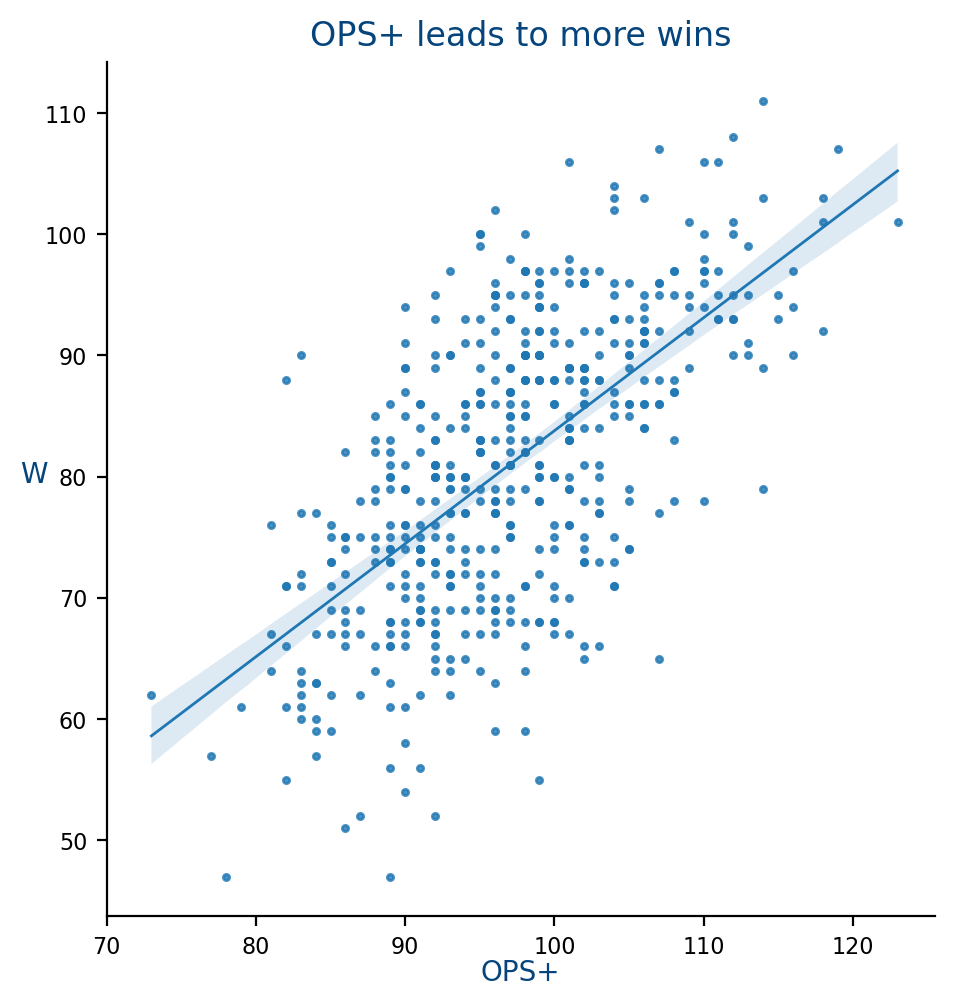

In [51]:
model = sns.lmplot(data=tm_batting, x='OPS+', y='W',
           scatter_kws={'s': 5},
           line_kws={'linewidth':1})

plt.xticks(ticks=np.arange(70, 121, 10), fontsize=8)
plt.xlabel('OPS+', labelpad=0, color='#05457C')
plt.yticks(ticks=np.arange(50, 111, 10), fontsize=8)
plt.ylabel('W', rotation=0, color='#05457C')


plt.title('OPS+ leads to more wins', color='#05457C')

sns.despine()

In [52]:
coef = model.coef_[0]
intercept = model.intercept_

AttributeError: 'FacetGrid' object has no attribute 'coef_'